# Analyza axialniho mikropohybu podel osy $z$

Nejprve nacitam foton-korelacni signaly namerene pro pripad elektrod pasti bez pridane elektroniky a s pridanou elektronikou.

In [1]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")
data_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_voltages.txt", delimiter="\t")
data_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_delim.txt", delimiter="\t")[:,:2]
voltages_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_voltages.txt", delimiter="\t")

fotkor_bezcond=np.concatenate( (data_bezcond_p1 ,data_bezcond_p2, data_bezcond_p3) ,axis=1)
voltages_bezcond=np.concatenate( (voltages_bezcond_p1 ,voltages_bezcond_p2, voltages_bezcond_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor_bezcond)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

Nyni se zkusim mrknout, jak vypadaji foton korelacni data. 

In [3]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

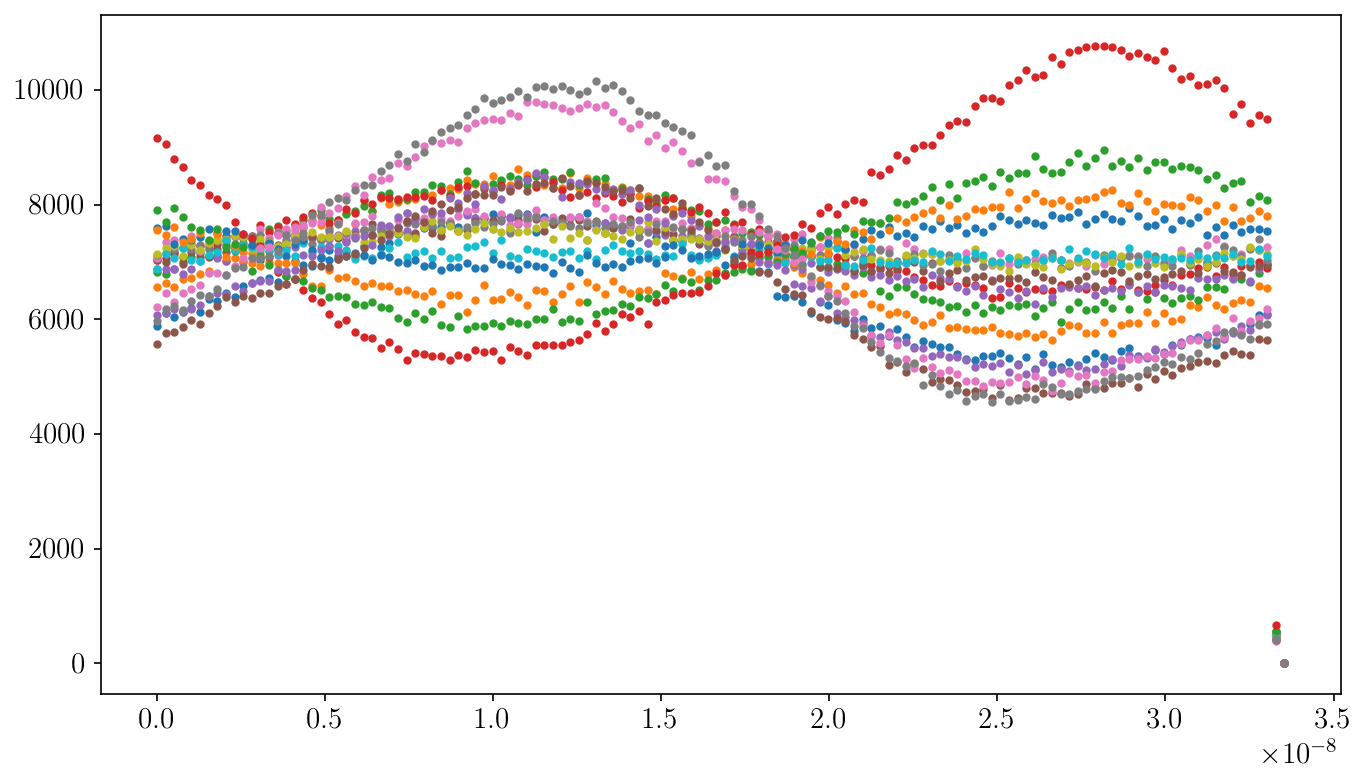

In [4]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(t_scale,fotkor_bezcond,'.')

vidime, ze vsechny signaly maji stejnou periodu triggeru. Tuto poriodu odhadnu a pomoci ni vyjadrim budici frekvenci.
Vidim, ze posledni bin histogramu ma nulove county, tzn. v tomto binu predpokladam, ze presna perioda neni. Predposledni bin ma urcity pocet countu lisici se od predpredposledniho binu. Predpokladam tedy, ze presna perioda triggeru lezi nekde v ramci predposledniho binu. Polohu teto periody v ramci binu odhadnu linearni interpolaci, kde vyuziju pomer mezi county tohoto predposledniho binu a predchoziho binu. K ucelu tohoto odhadu vyberu krivku, ktera ma na konci minimalni derivaci.

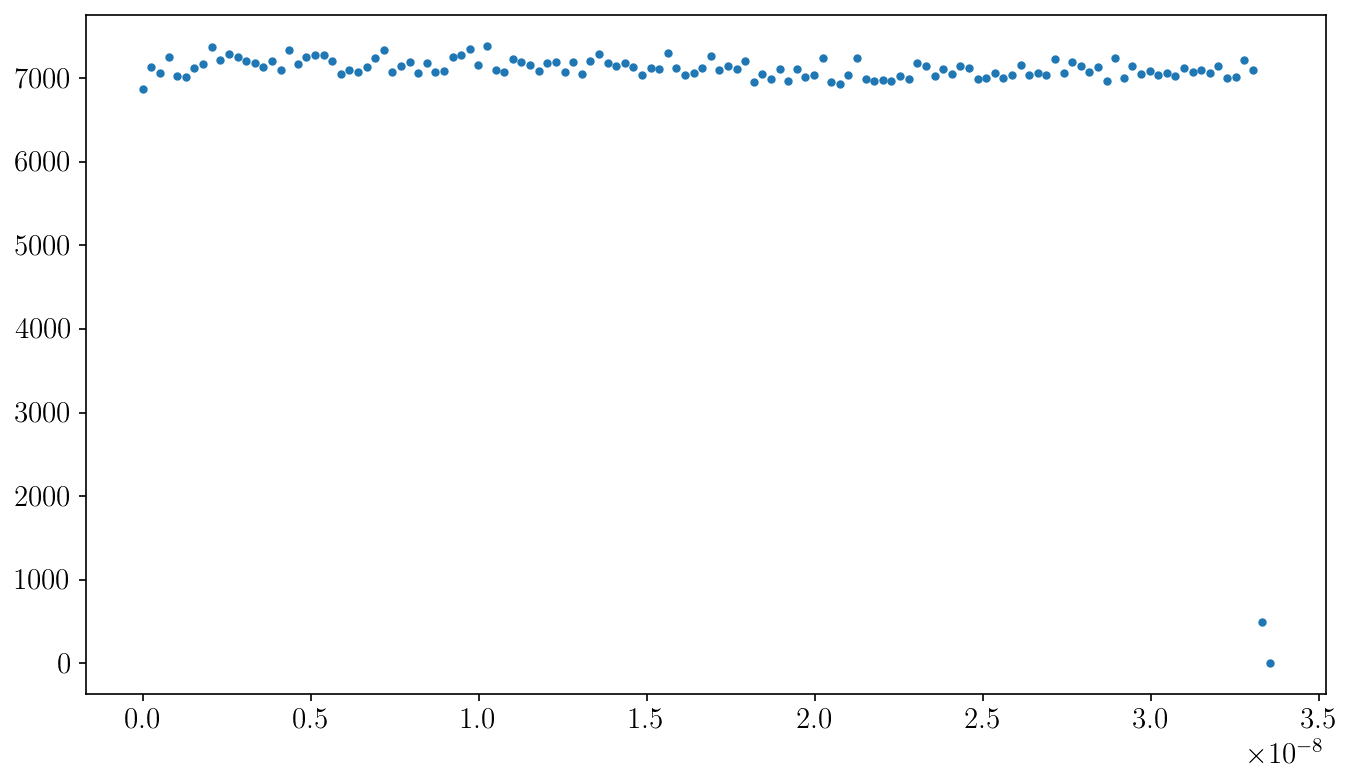

In [5]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(t_scale,data_bezcond_p2[:,1],'.')

In [6]:
# odhad periody triggeru
T_trig = ( fotkor_bezcond[fotkor_shape[0]-2, 9] / fotkor_bezcond[fotkor_shape[0]-3, 9] )* t_res + t_scale[fotkor_shape[0]-2]

# frekvence buzeni pasti

drive_freq = 1/T_trig
Omega = 2*np.pi * drive_freq
drive_freq

30032035.976450287

## kvalitativni odhad amplitudy mikropohybu

Momentalne neni presne znamy detuning cooling laseru, pri kterem bylo mereni provedeno. Z toho duvodu provedu pouze kvalitativni odhad miry mikropohubu. Jako tuto miru buzu brat pomer amplitudy modulace signalu vuci stredni hodnote signalu. Toto urcim pomoci fitu.

In [7]:
# funkce vracejici residua
def fit_resid(x, Omega, S, time_step):
    # x = [S_0, Delta S, phi]
    len_S = len(S)
    #print(len_S)
    S_fit = x[0] + x[1] * np.cos(Omega * time_step * np.arange(0, len_S) - x[2])
    return (S - S_fit)**2

def fit_func(x, Omega, time_points):
    return x[0] + x[1] * np.cos(Omega * time_points - x[2])

In [8]:
from scipy.optimize import least_squares

x0 = [fotkor_bezcond[:fotkor_shape[0]-2,0].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,0].max()
    -fotkor_bezcond[:fotkor_shape[0]-2,0].min() ), 1.5]

#fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , ftol=1e-10, xtol=1e-10)
fit

 active_mask: array([0., 0., 0.])
        cost: 20474150050.02637
         fun: array([1.03288573e+04, 3.26659084e+03, 3.37529482e+03, 1.70169199e+03,
       6.85029687e+02, 2.21189255e+04, 8.52593818e+01, 7.42340894e+03,
       1.15817423e+02, 1.75384837e+04, 6.44958033e+01, 8.86315822e+01,
       5.49554694e+02, 2.70143425e+03, 2.98853380e+04, 1.39241154e+04,
       7.53078778e+03, 2.95919298e+03, 1.57264519e+04, 1.09637894e+03,
       1.67424325e+04, 1.00252143e+04, 5.80546015e+03, 3.62829386e+04,
       5.31111324e+03, 6.19725008e+03, 3.01298620e+04, 1.89578572e+04,
       5.52724003e+02, 1.29321444e+03, 1.66308832e+04, 2.38205243e+02,
       1.31855268e+03, 1.89503666e+03, 9.63345419e+02, 8.24083939e+03,
       2.02458513e+04, 2.13447001e+03, 1.08974670e+03, 9.34640978e+03,
       2.73338807e+03, 1.90823530e+02, 5.97165460e+03, 9.34435021e+03,
       4.84119948e+04, 4.51303408e+03, 2.47391807e+03, 1.25202004e+02,
       7.90775519e+03, 1.83402989e+04, 5.09141348e+04, 1.56141993e+0

Text(3e-08, 7500, '$\\frac{\\Delta S}{S_0}  = \\,\\,$$0.19345$')

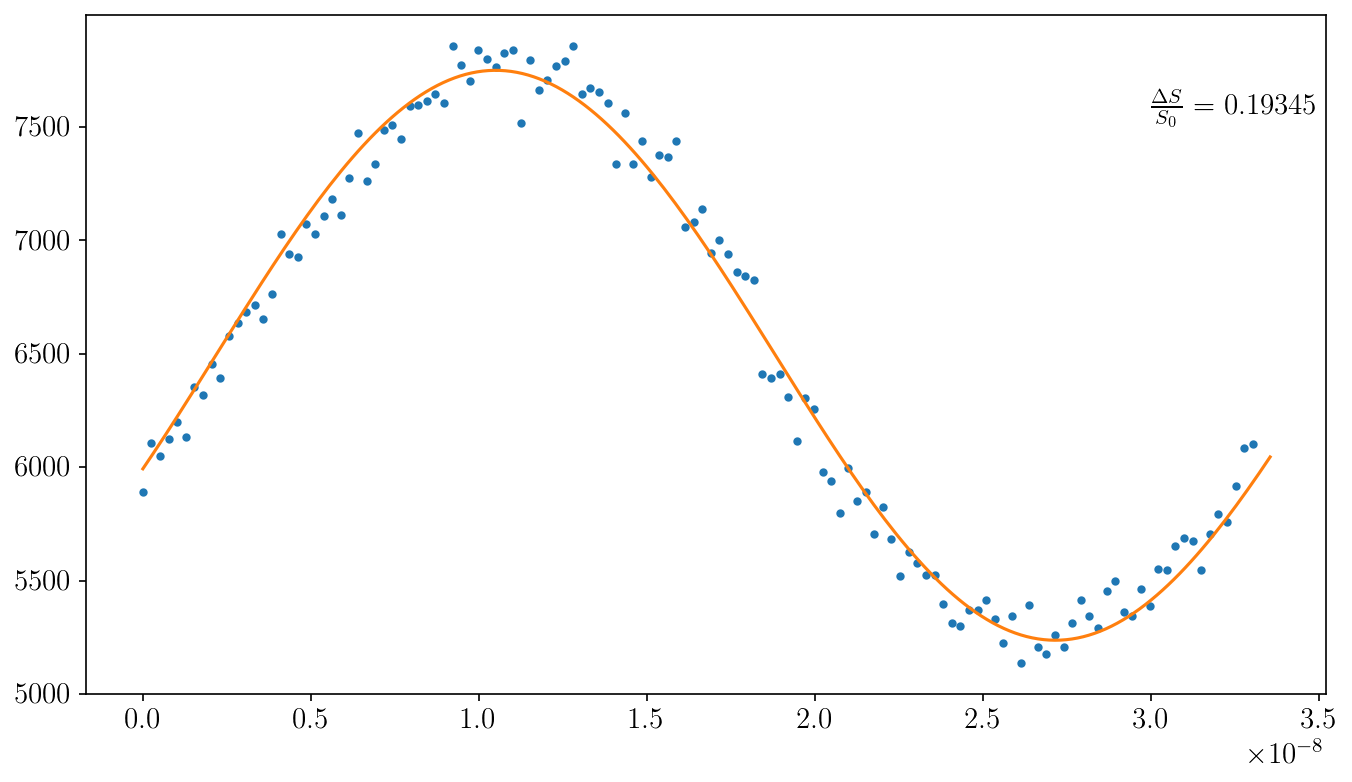

In [9]:
# plot fitu
time_fit = np.linspace(0, t_scale.max(), 200)
fotkor_fit = fit_func(fit.x, Omega, time_fit)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(t_scale[:fotkor_shape[0]-2],fotkor_bezcond[:fotkor_shape[0]-2,0],'.')
plt.plot(time_fit, fotkor_fit)
text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f}$'.format(fit.x[1]/fit.x[0])
plt.text(3e-8, 7500,text) 

fit vypada, ze je ok. Nyni nafituji vsechny data

In [12]:
# cyklus fitujici vsechny foton-korelacni data

x = np.zeros( (3,fotkor_shape[1]) )
DeltaS_S_ratio = []
for i in range(fotkor_shape[1]):
    x0 = [fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,i].max()
        -fotkor_bezcond[:fotkor_shape[0]-2,i].min() ), 2]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,i], t_res) , ftol=1e-10, xtol=1e-10)
    
    x[:,i] = fit.x
    DeltaS_S_ratio.append(x[1,i]/x[0,i]  )
    

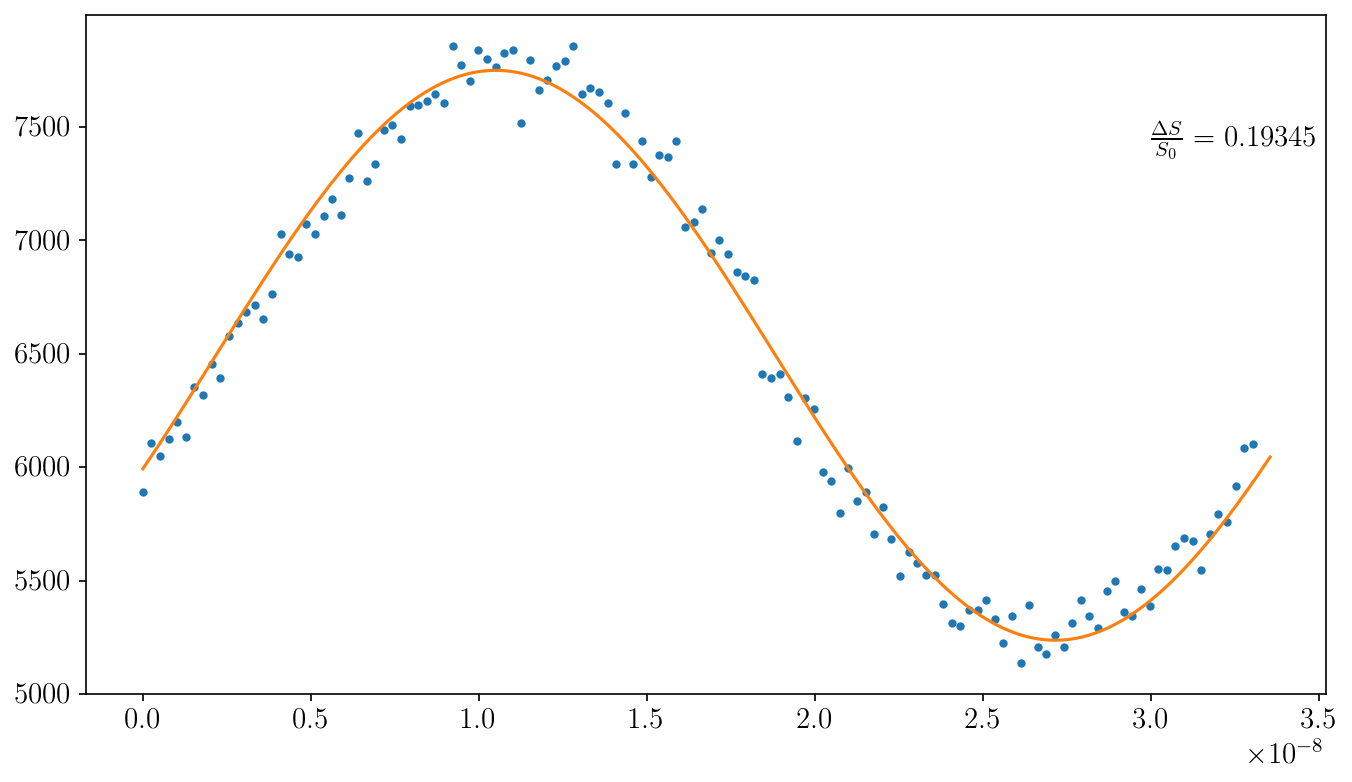

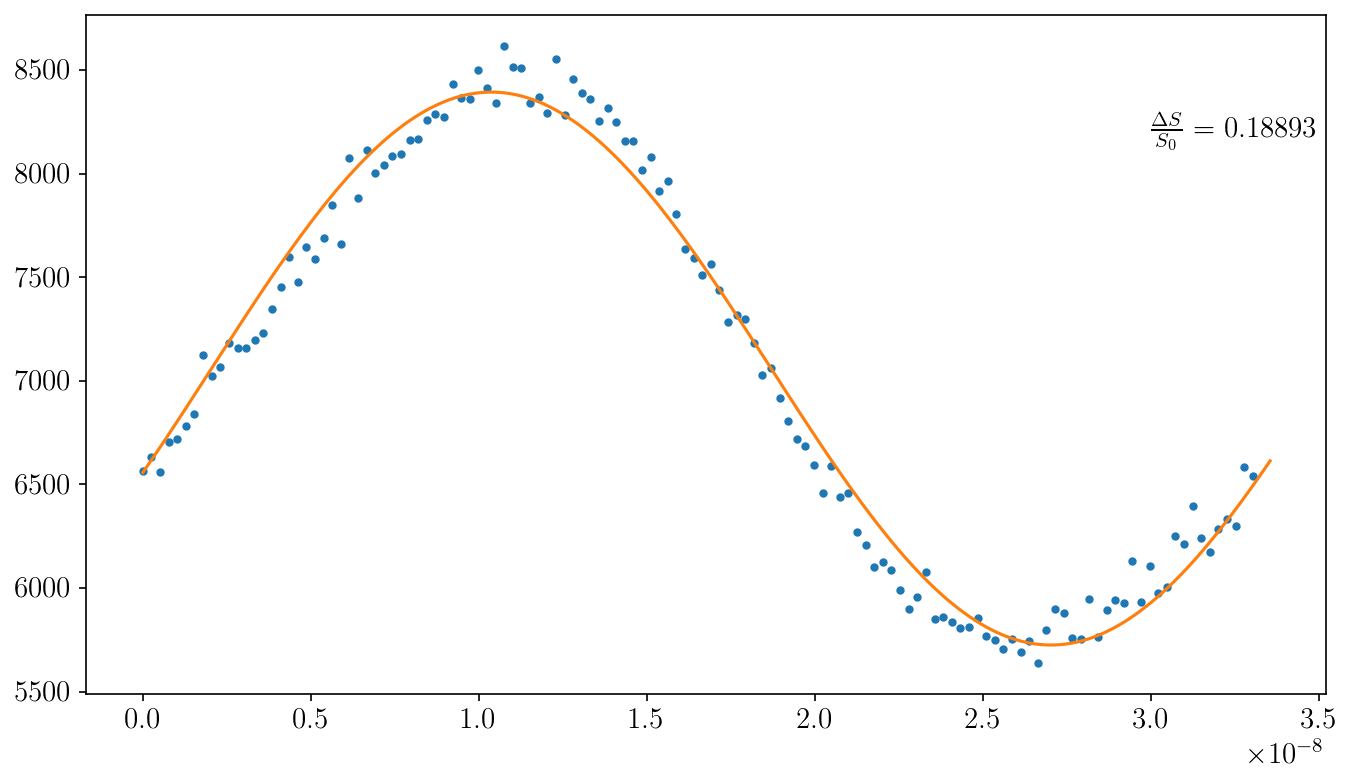

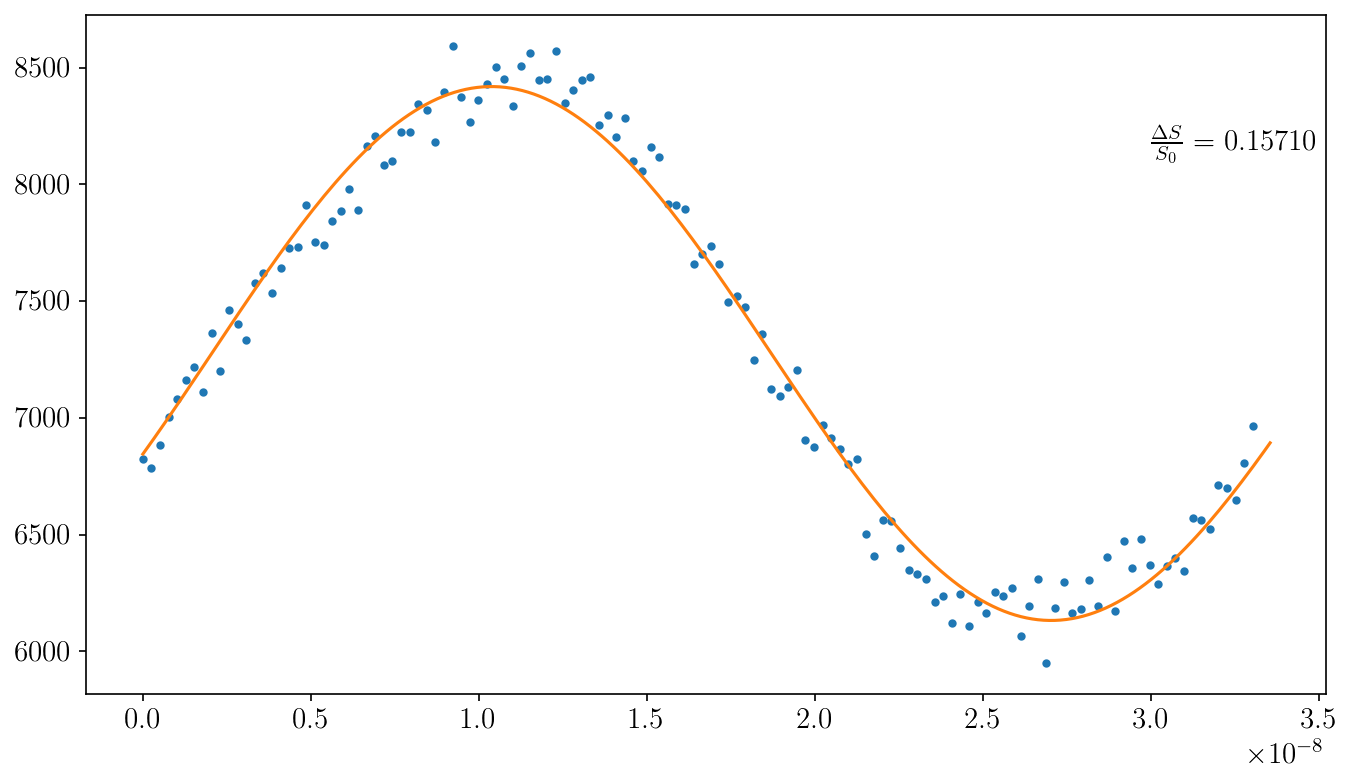

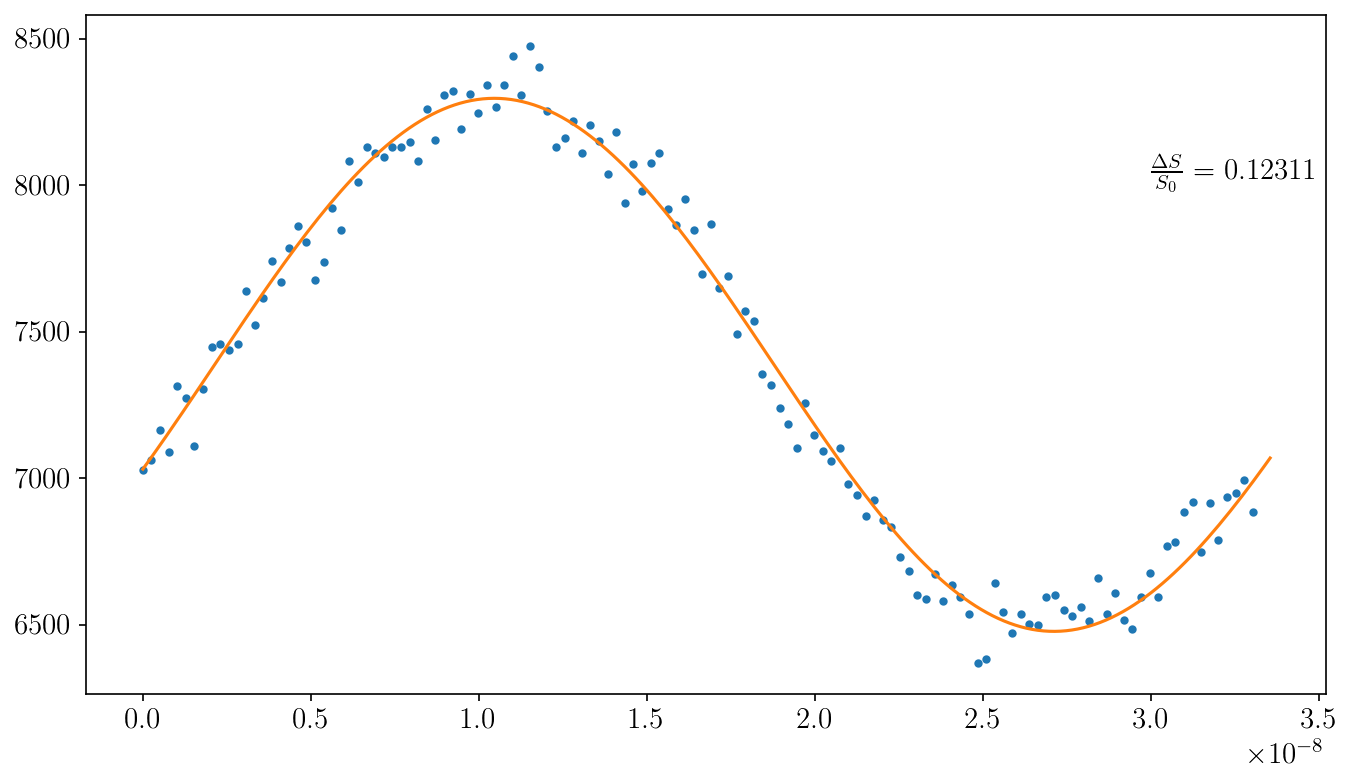

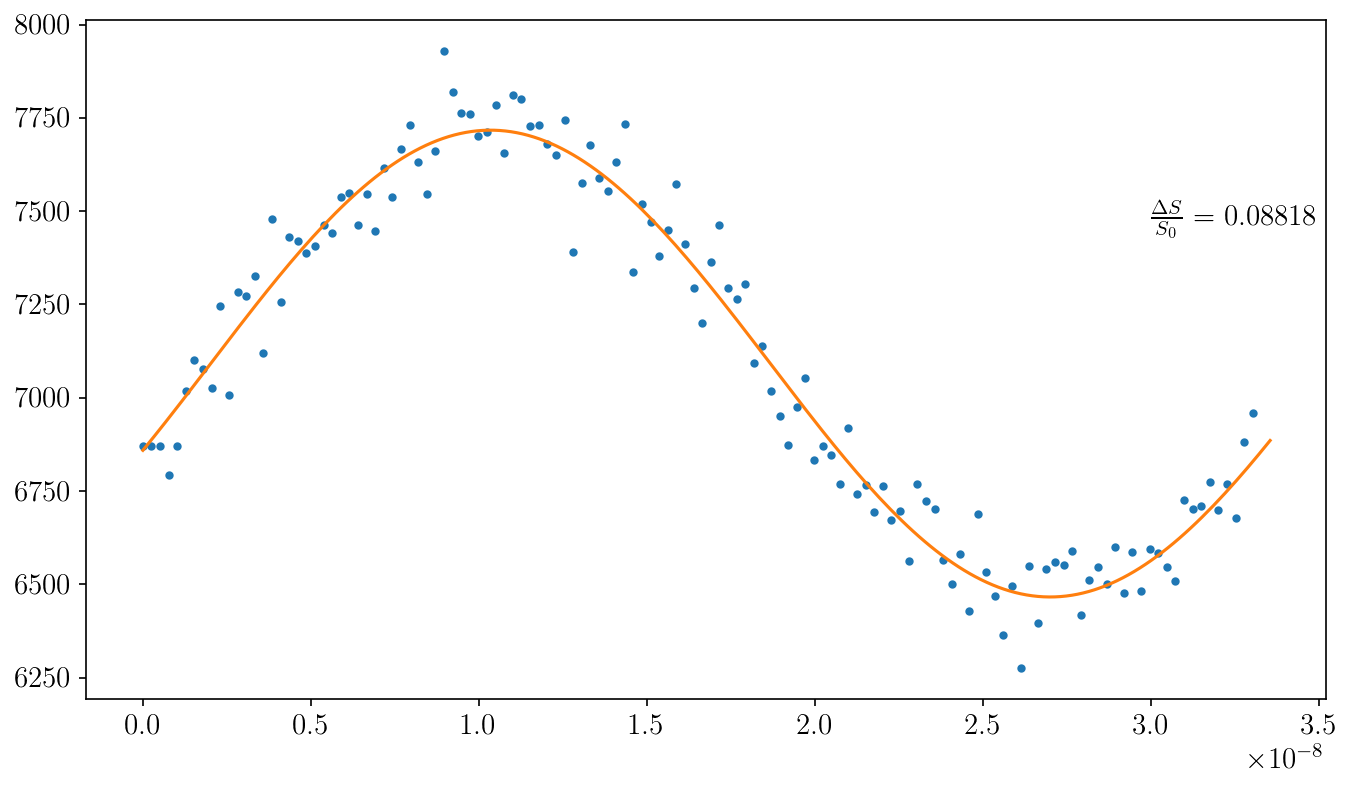

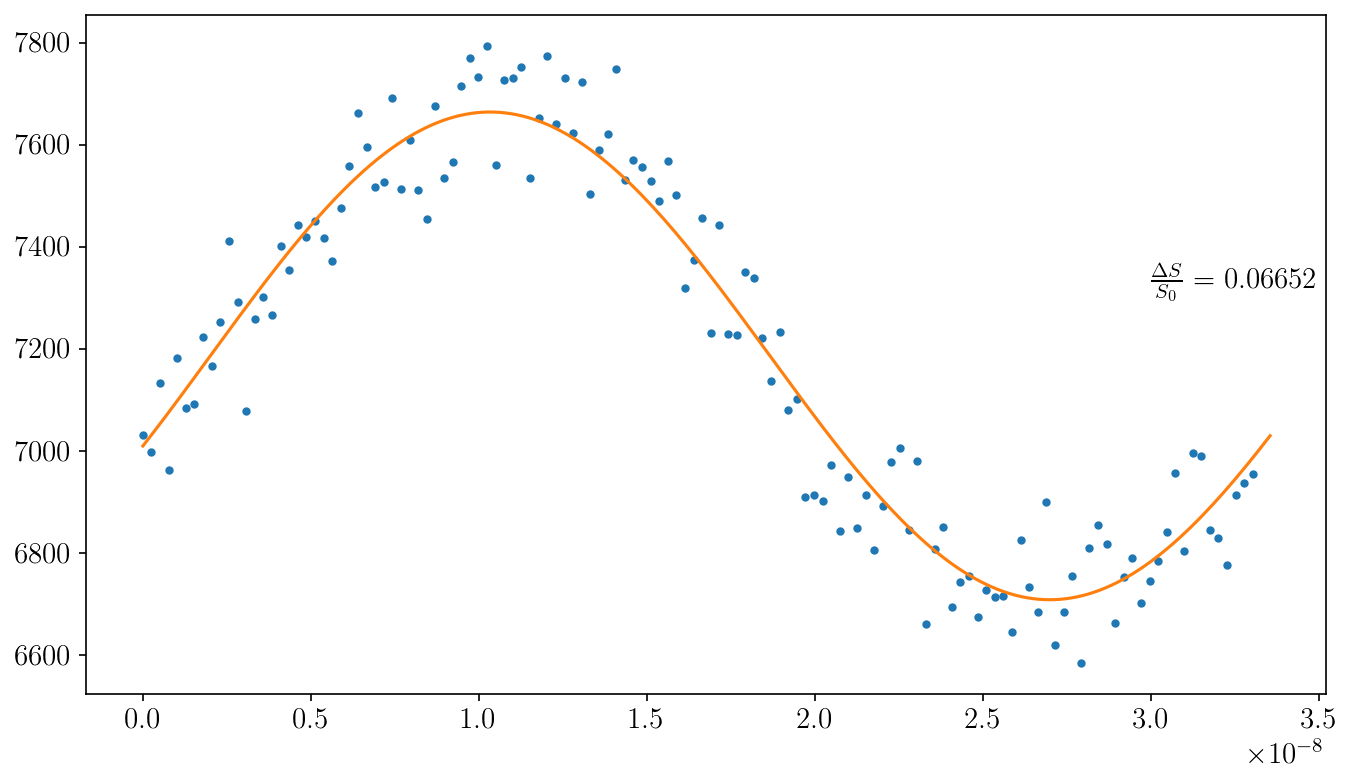

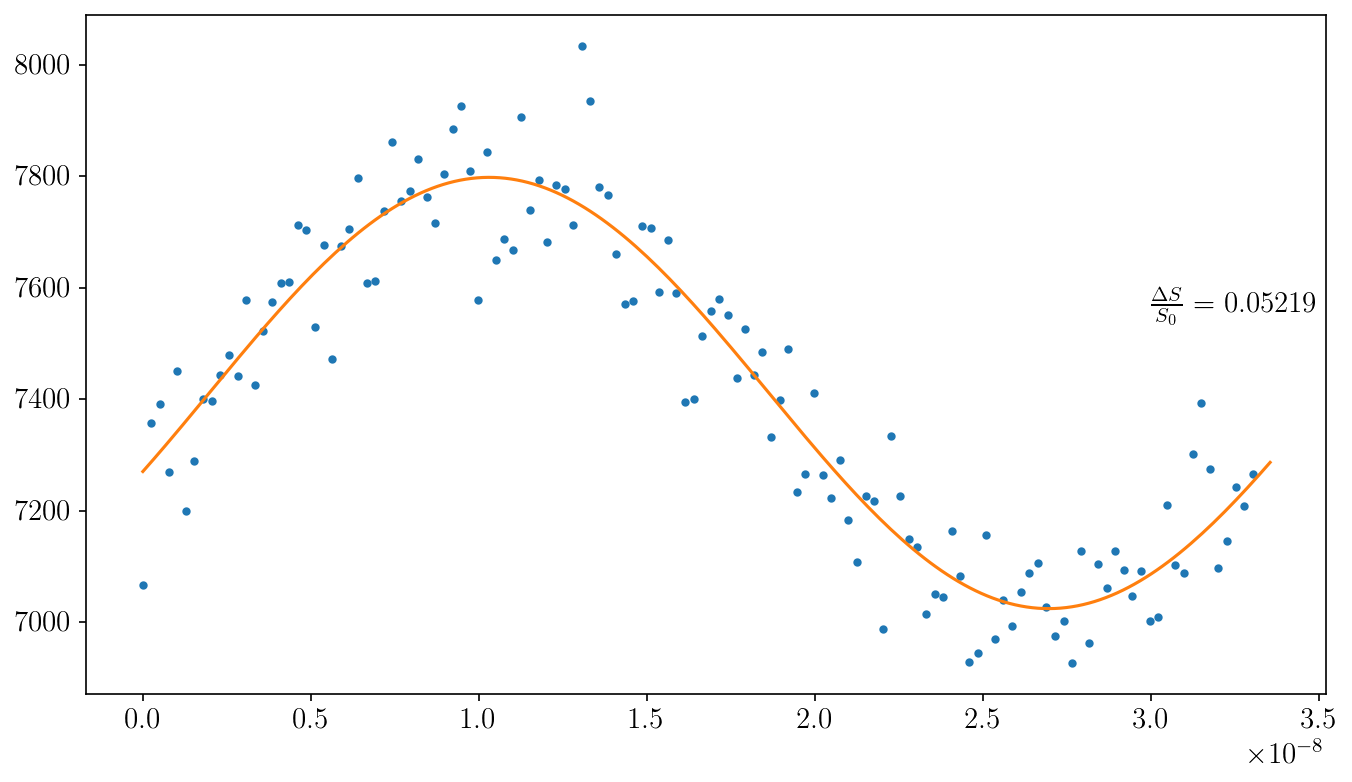

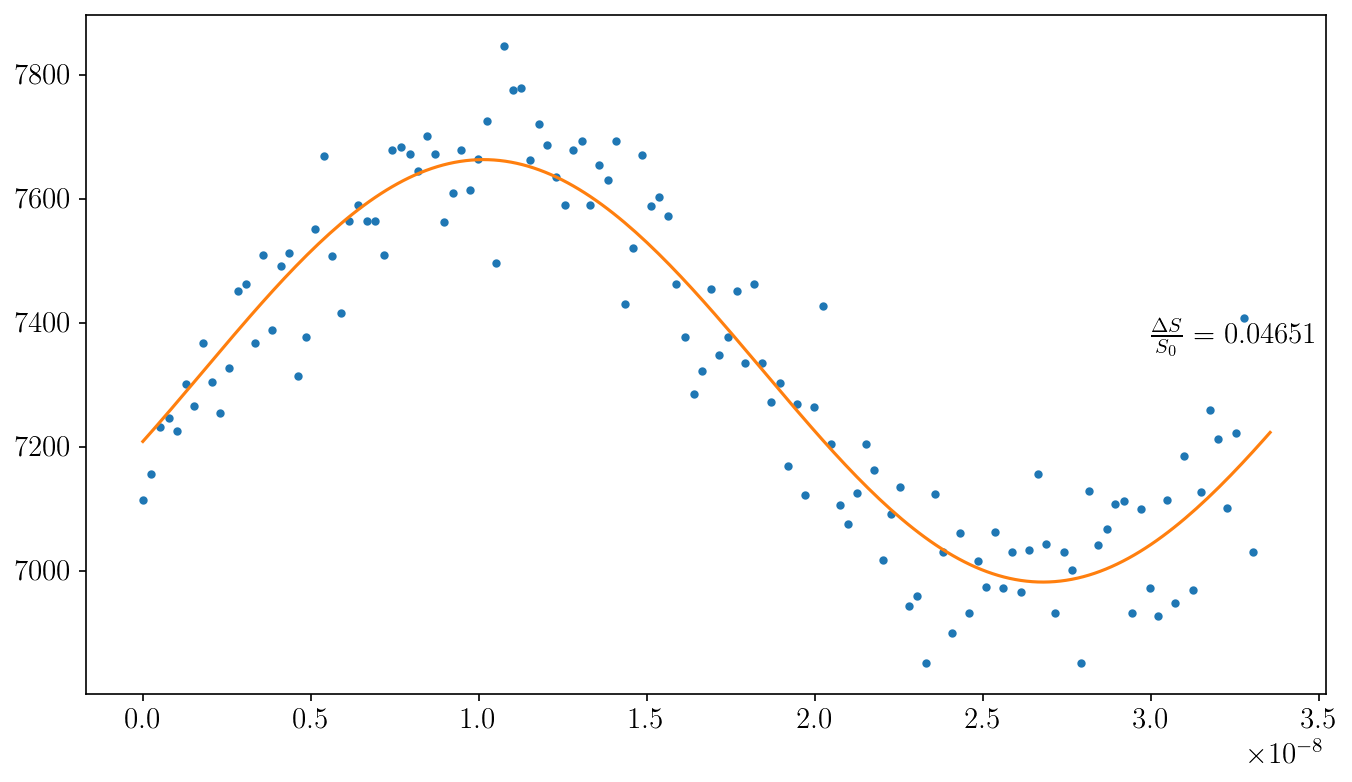

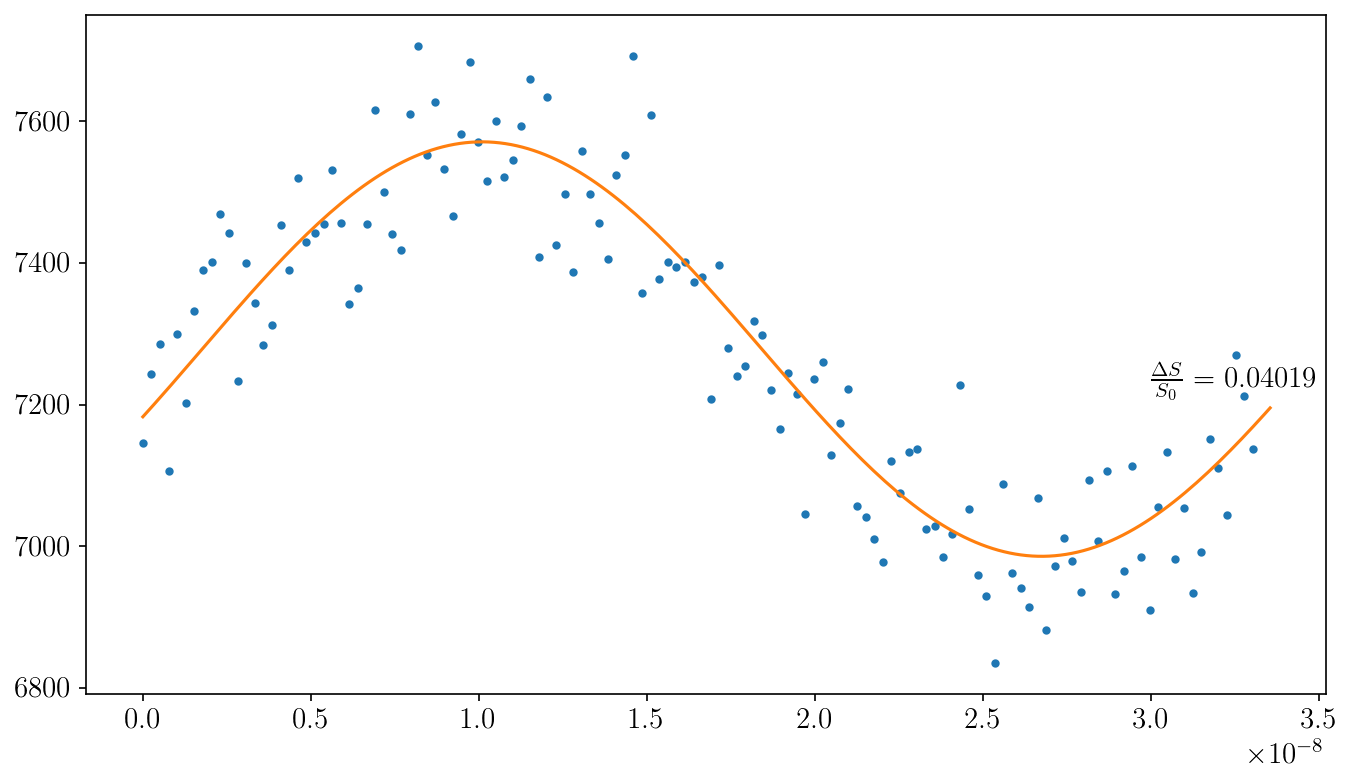

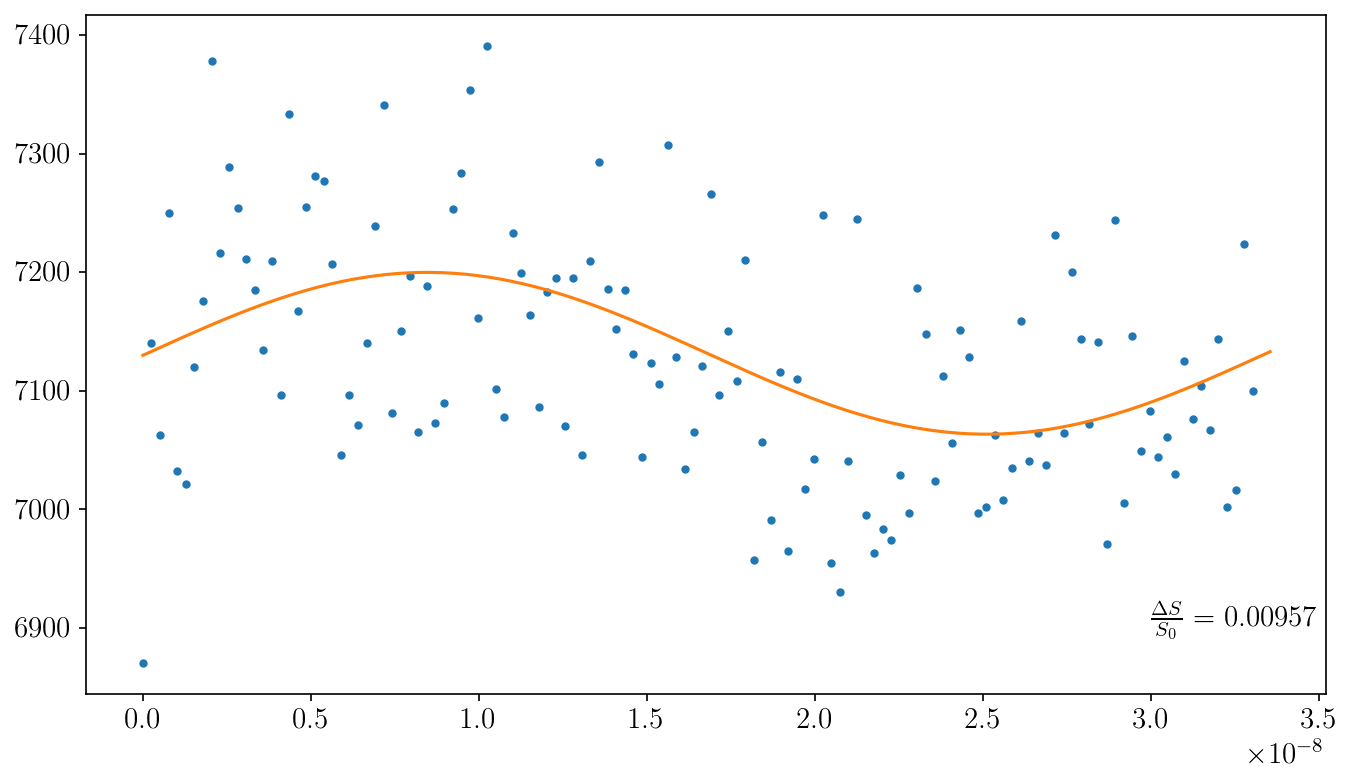

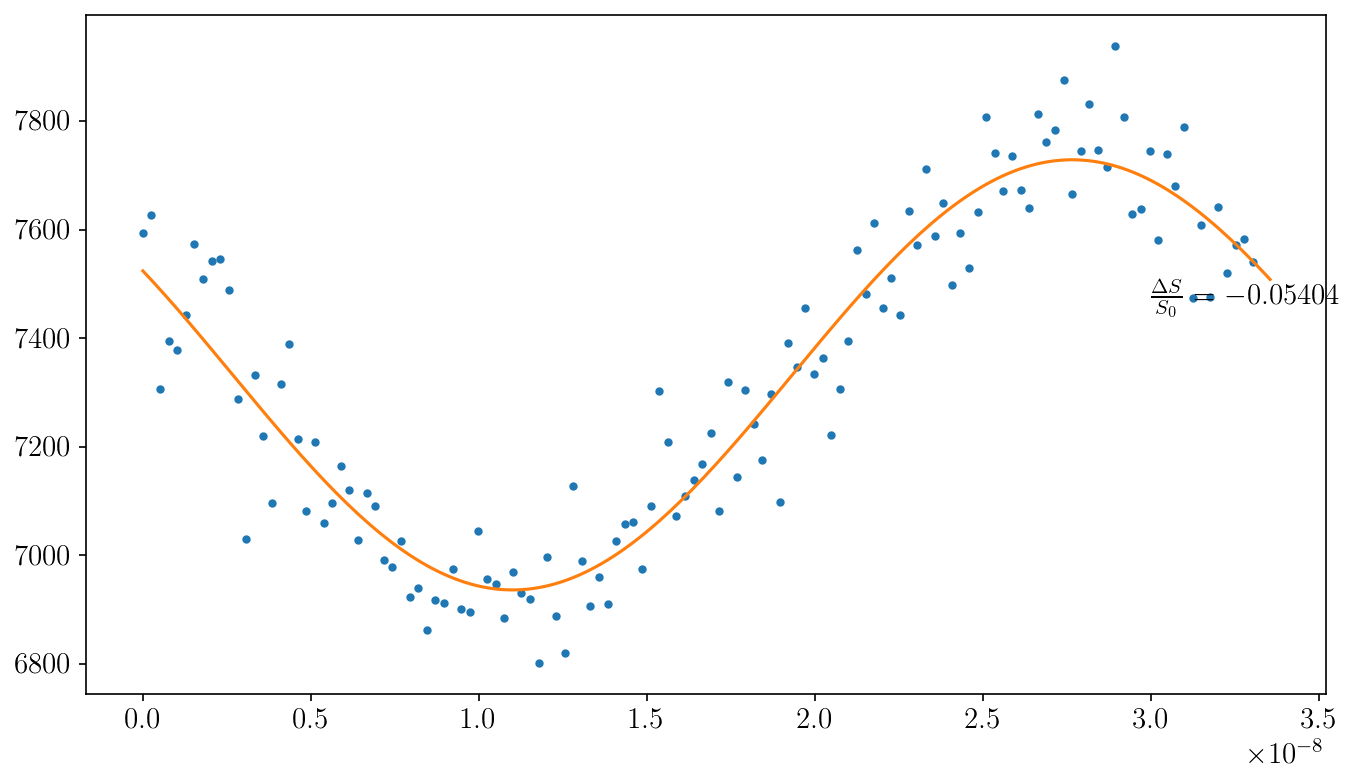

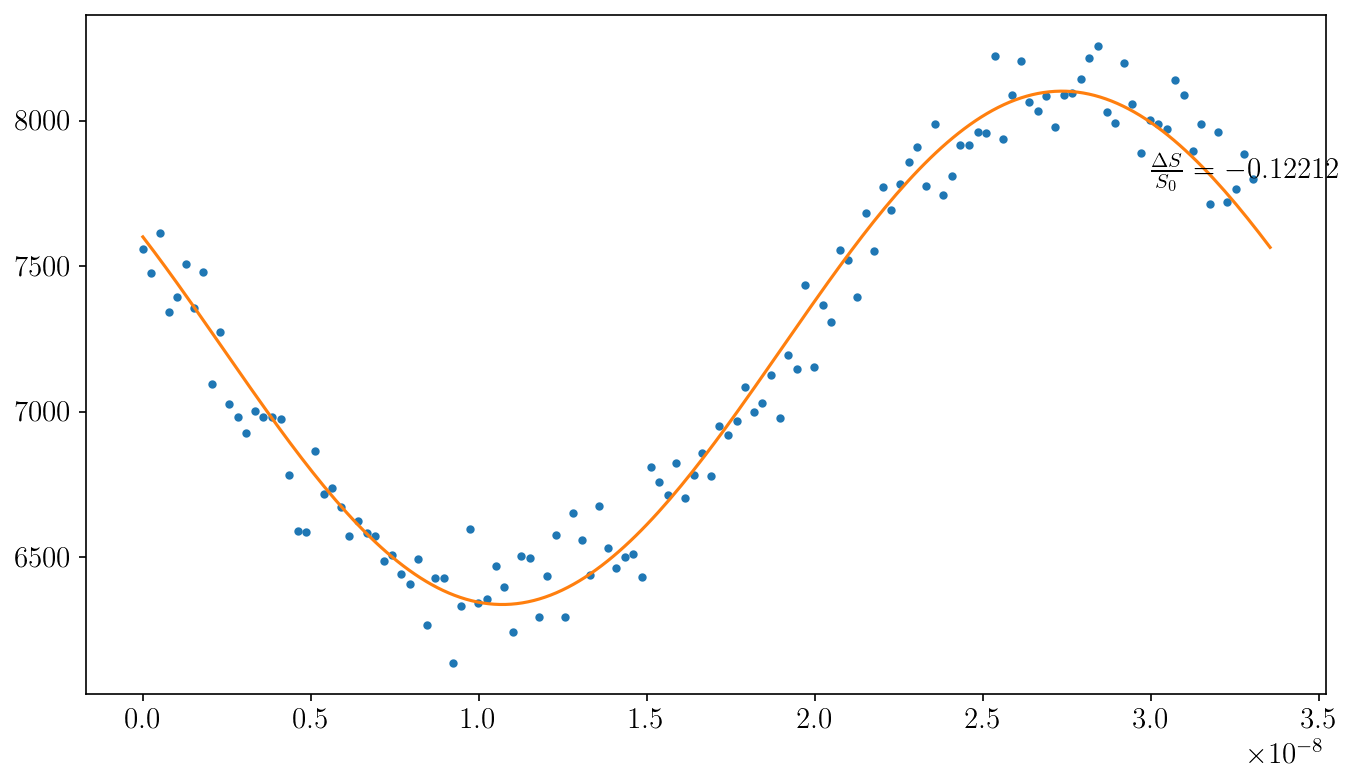

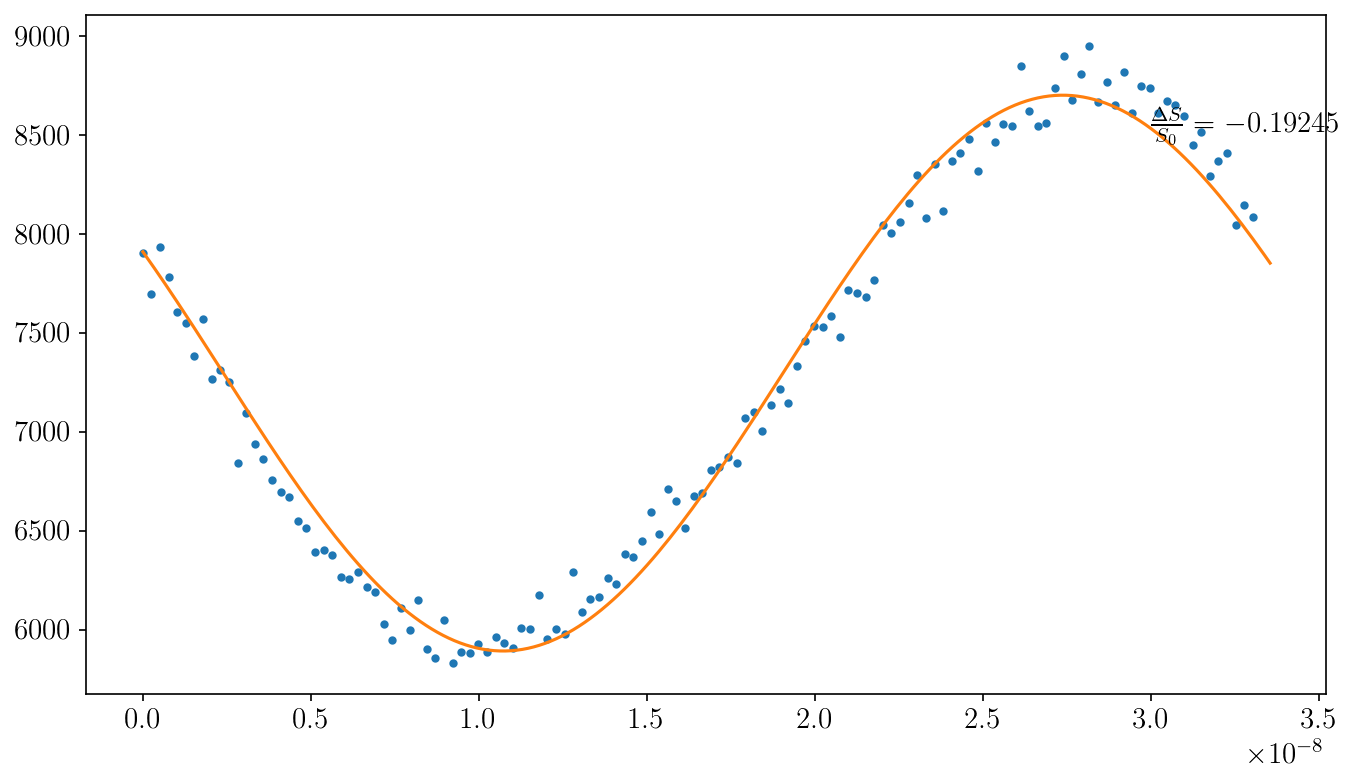

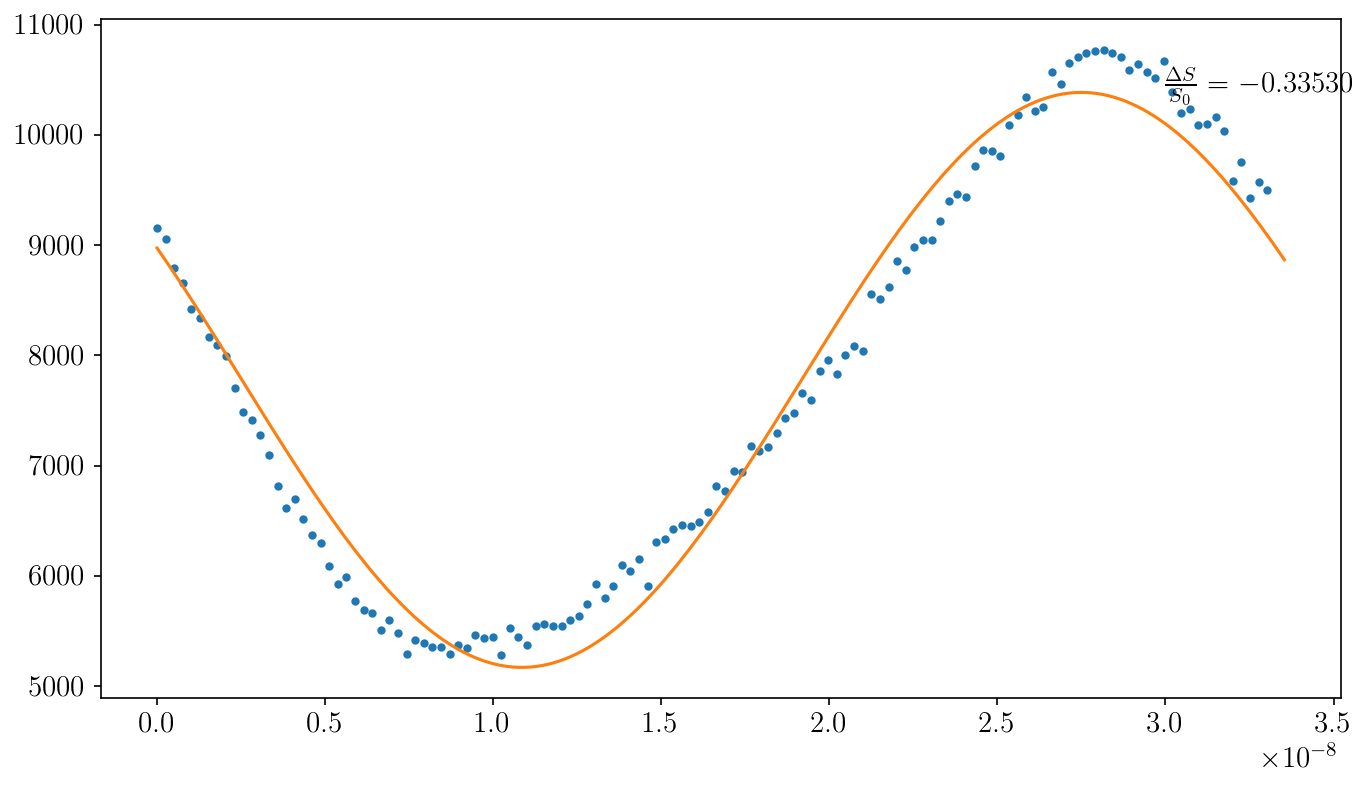

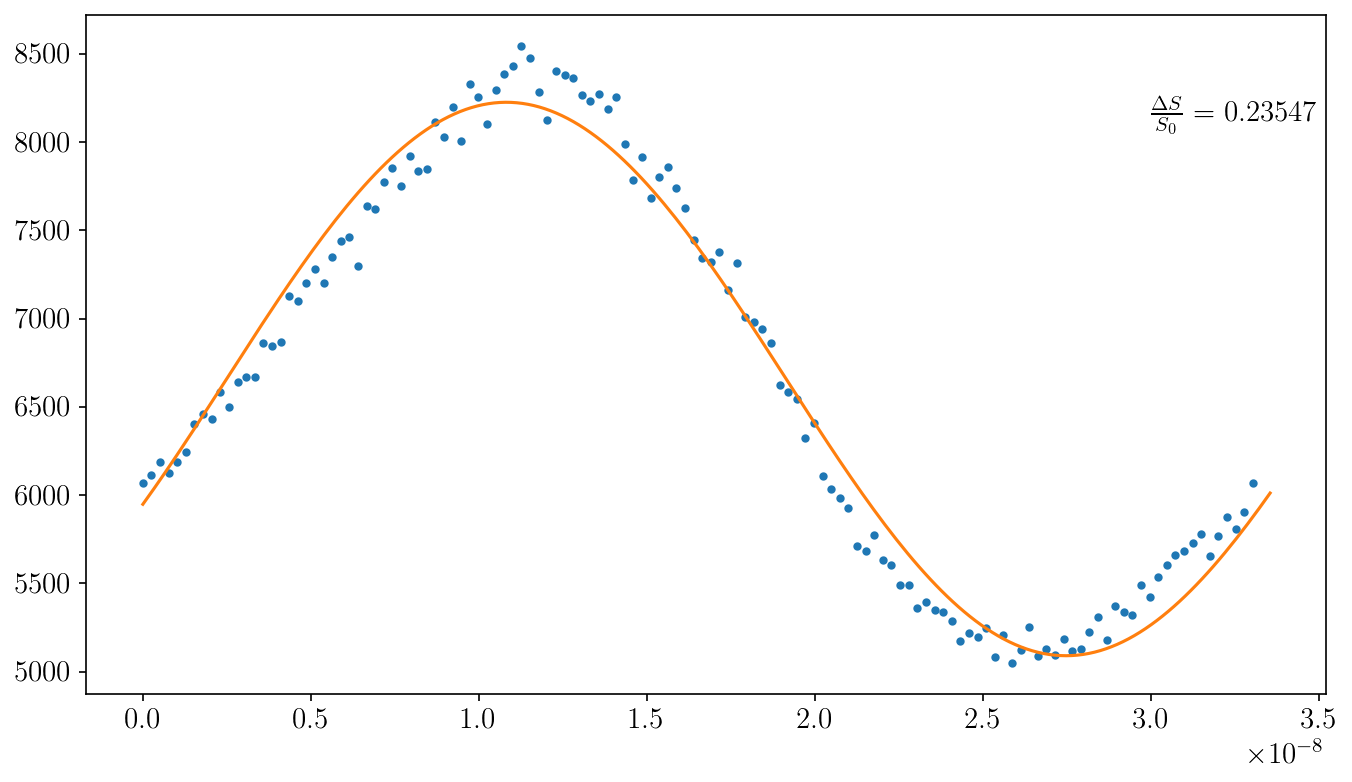

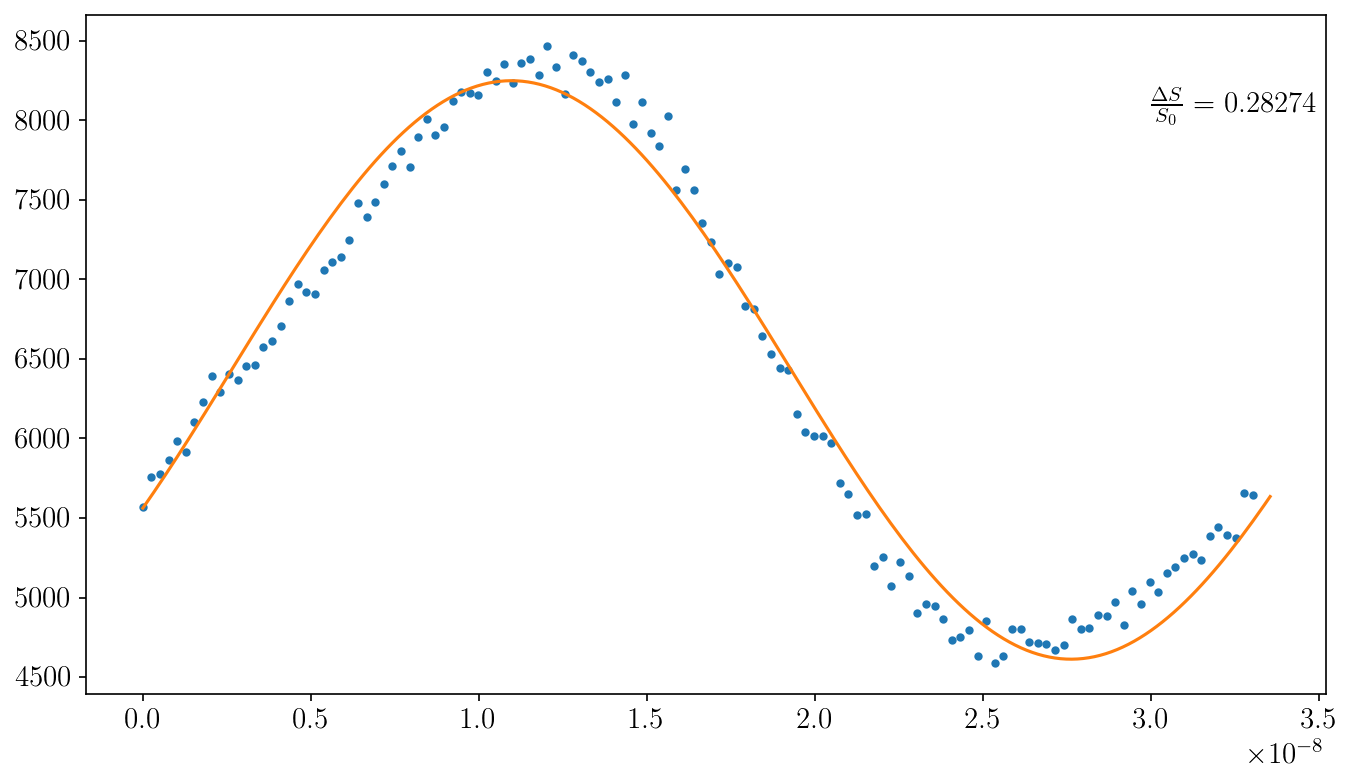

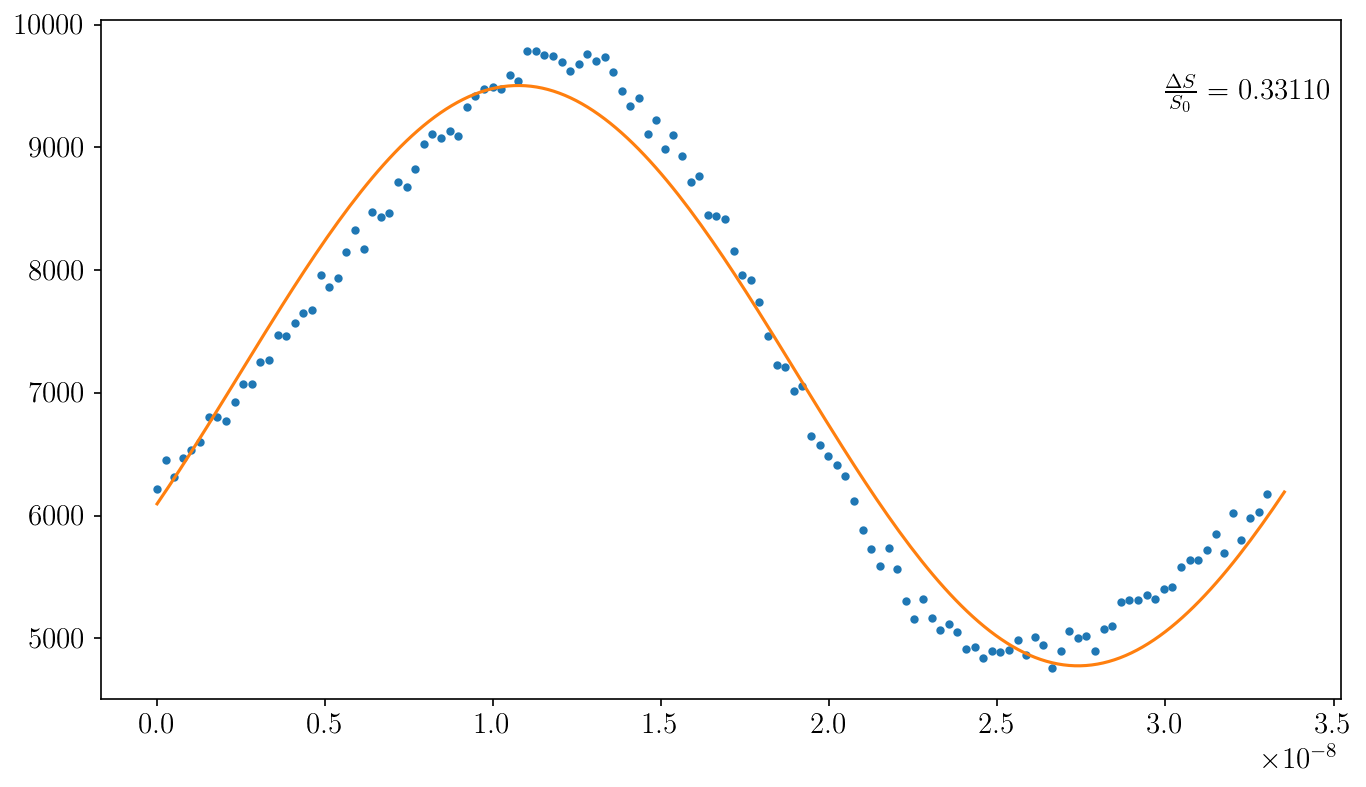

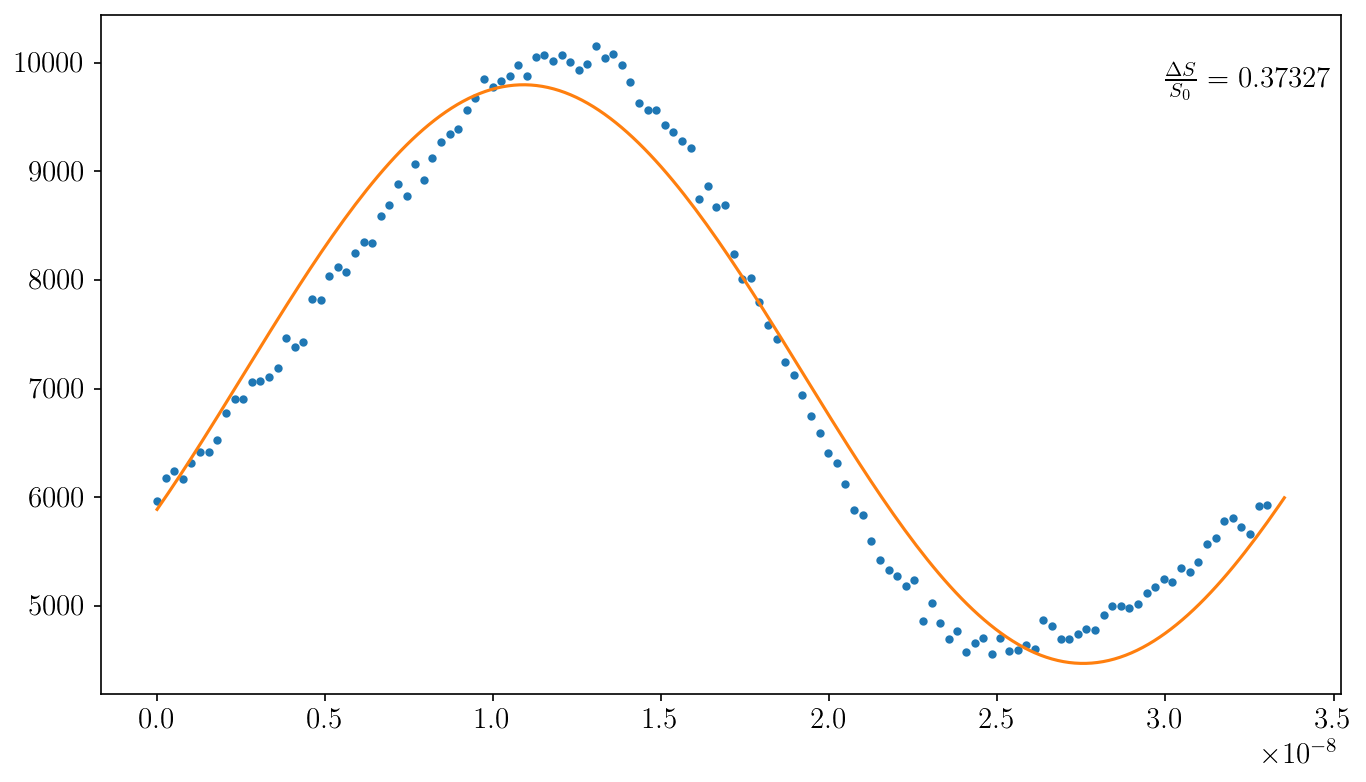

In [13]:
# plot techto fitu
time_fit = np.linspace(0, t_scale.max(), 200)

for i in range(fotkor_shape[1]):
    
    fotkor_fit = fit_func(x[:,i], Omega, time_fit)
    
    plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor_bezcond[:fotkor_shape[0]-2,i],'.')
    plt.plot(time_fit, fotkor_fit)
    text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f}$'.format(x[1,i]/x[0,i])
    plt.text(3e-8, fotkor_bezcond[:,i].max()-500,text) 

V pripade velke modulace se zda, ze signal uz neni ciste harmonicky. Lze vsak predpokladat, ze v tomto pripade je jiz mikropohyb znacny. Nyni zkusim vykreslit pomery $\Delta S / S_0 $ v zavislosti na rozdilu napeti na axialnich elektrodach.

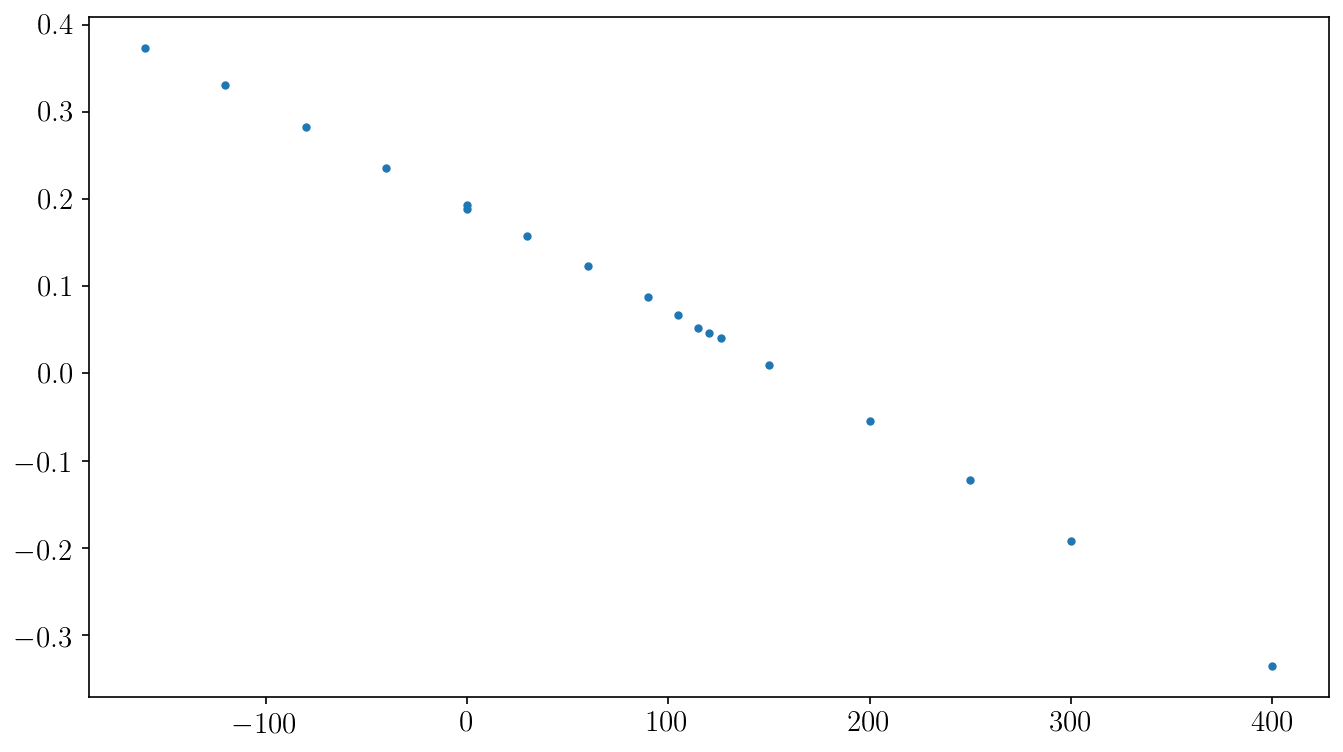

In [14]:
delta_U = voltages_bezcond[:,0] - voltages_bezcond[:,1]

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(delta_U, DeltaS_S_ratio, '.')

Dle ocekavani.

## Stejna analyza v pripade pridani kondenzatoru na axialni elektrody

Na axialni elektrody byly pridany kondenzatory tak, aby byla na obou axialnich elektrodach stejna kapacita (v obou pripadech $33 \, \rm pF$). Za techto okolnosti jsme namerili RF potencial na axialnich elektrodach kmitajici s amplitudou $31,5 \, \rm V$.

In [15]:
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_delim.txt", delimiter="\t")[:,:8]
voltages_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_voltages.txt", delimiter="\t")
data_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_delim.txt", delimiter="\t")[:,:2]
voltages_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_voltages.txt", delimiter="\t")

fotkor_cond=np.concatenate( (data_cond_p1 ,data_cond_p2) ,axis=1)
voltages_cond=np.concatenate( (voltages_cond_p1 ,voltages_cond_p2) ,axis=0)

# pomocne promene
fotkor_cond_shape = np.shape(fotkor_cond)

# parametry odecitani foton-korelacnich dat
t_res_cond = 256e-12  # casove rozliseni histogramu v s
t_measure_cond = 100 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale_cond = np.array( range(0,fotkor_cond_shape[0]) ) *t_res_cond


In [16]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

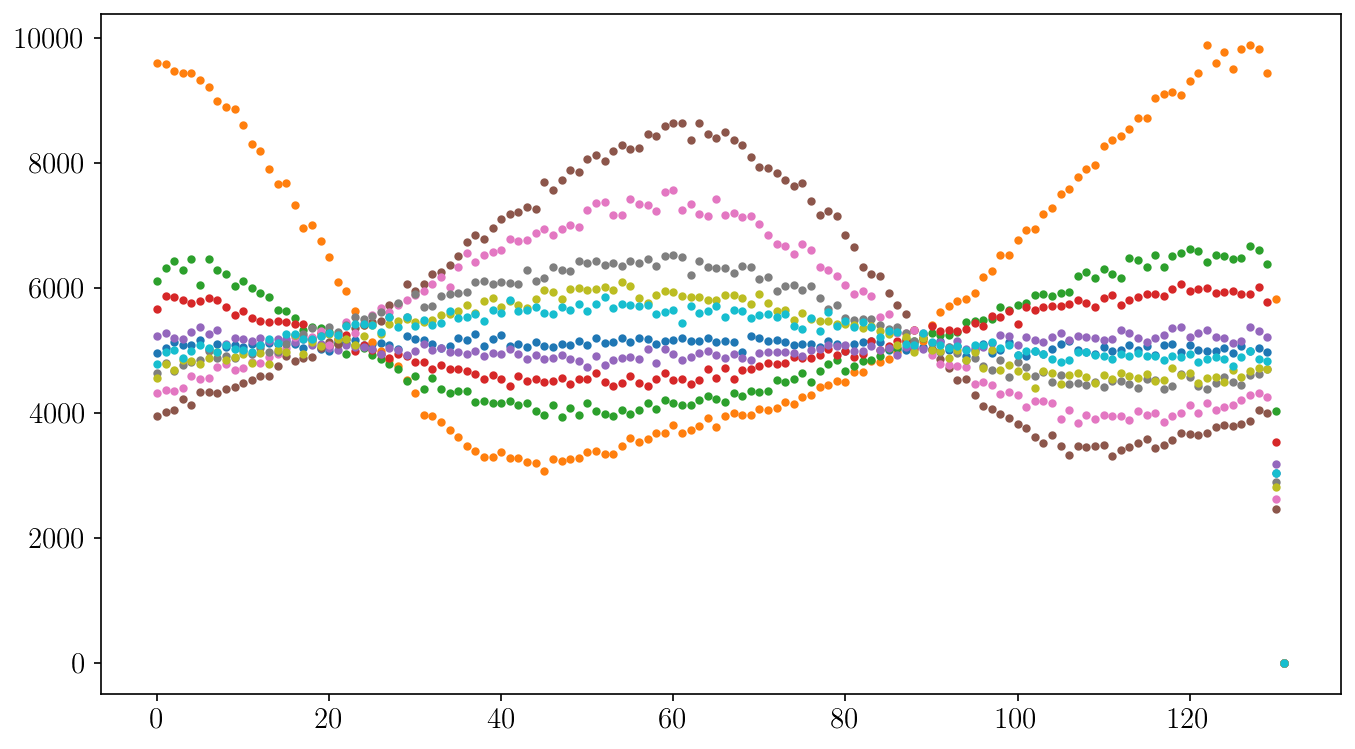

In [17]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(fotkor_cond,'.')

opet urcim periodu triggeru

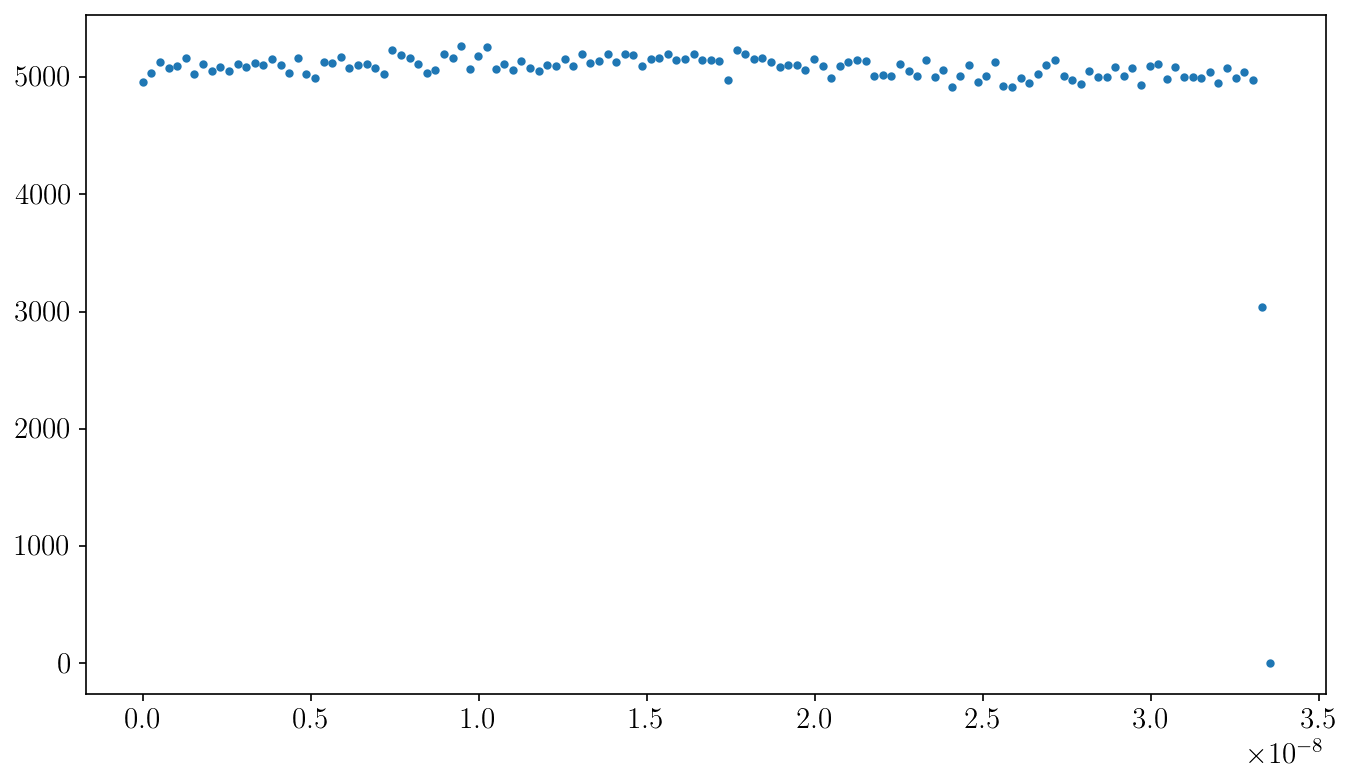

In [18]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(t_scale,fotkor_cond[:,0],'.')

In [19]:
# odhad periody triggeru
T_trig_cond = ( fotkor_cond[fotkor_cond_shape[0]-2, 0] / fotkor_cond[fotkor_cond_shape[0]-3, 0] )* t_res_cond + t_scale_cond[fotkor_cond_shape[0]-2]

# frekvence buzeni pasti

drive_freq_cond = 1/T_trig_cond
Omega_cond = 2*np.pi * drive_freq_cond
drive_freq_cond



29907562.902327076

jde se fitovat!!!

In [26]:
# cyklus fitujici vsechny foton-korelacni data

x_cond = np.zeros( (3,fotkor_cond_shape[1]) )
DeltaS_S_ratio_cond = []
for i in range(fotkor_cond_shape[1]):
    x0 = [fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), 0.5* ( fotkor_cond[:fotkor_cond_shape[0]-2,i].max()
        -fotkor_cond[:fotkor_cond_shape[0]-2,i].min() ), -1.9]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega_cond, fotkor_cond[:fotkor_cond_shape[0]-2,i], t_res_cond) , ftol=1e-10, xtol=1e-10)
    
    x_cond[:,i] = fit.x
    DeltaS_S_ratio_cond.append( x_cond[1,i]/x_cond[0,i]  )
    

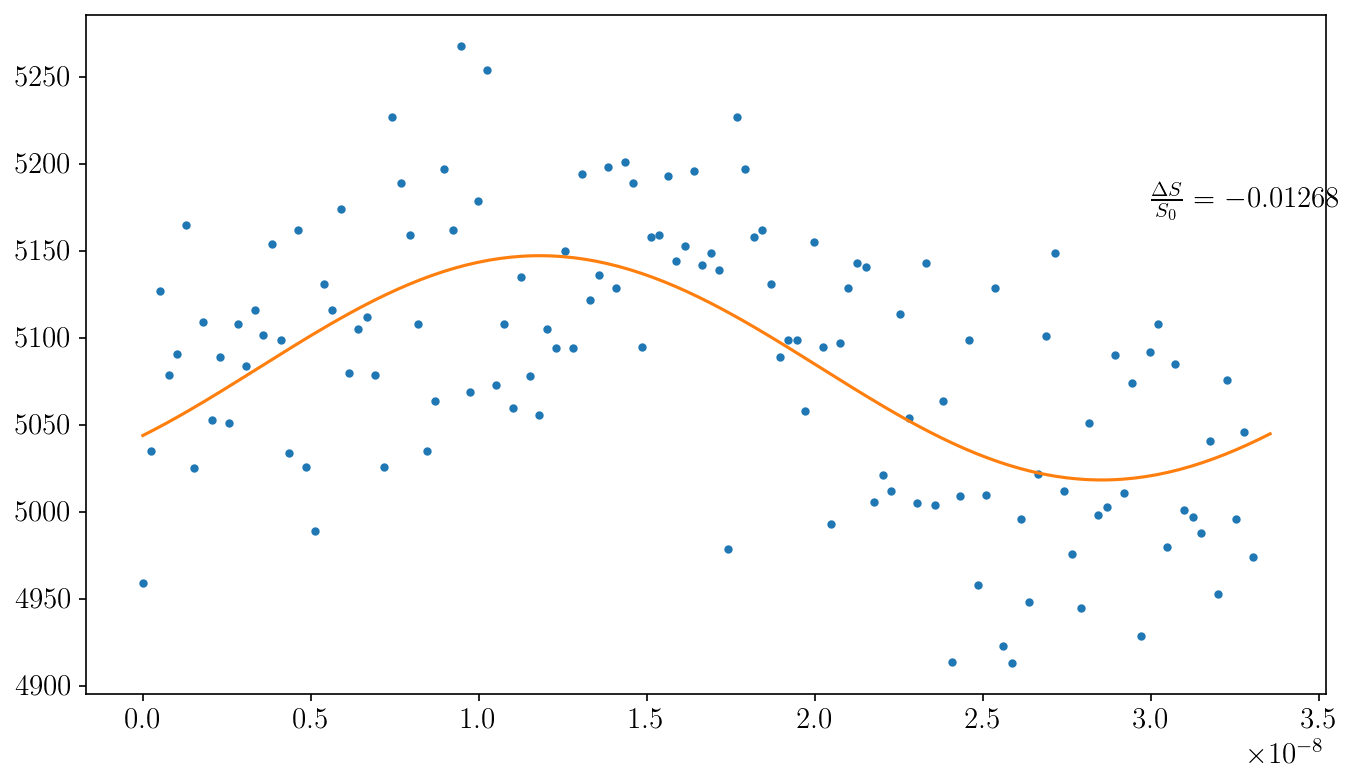

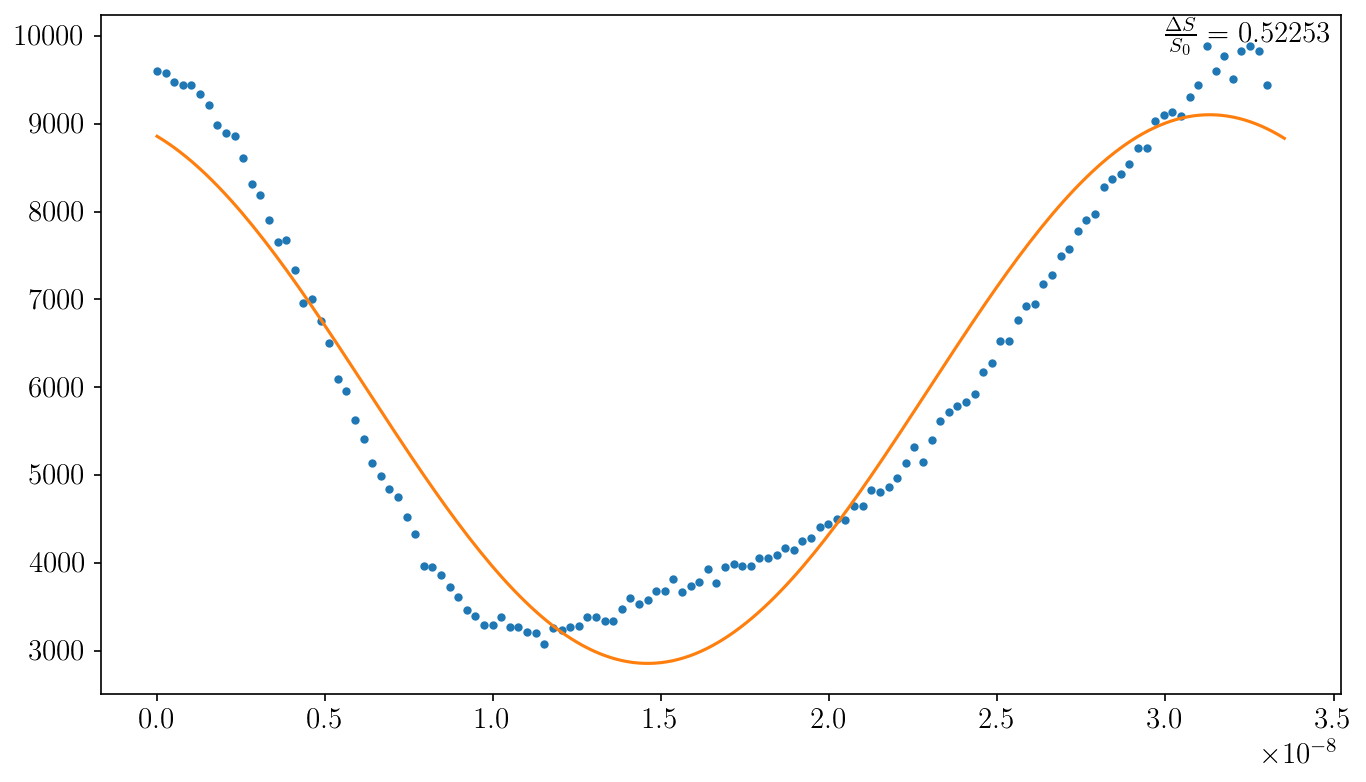

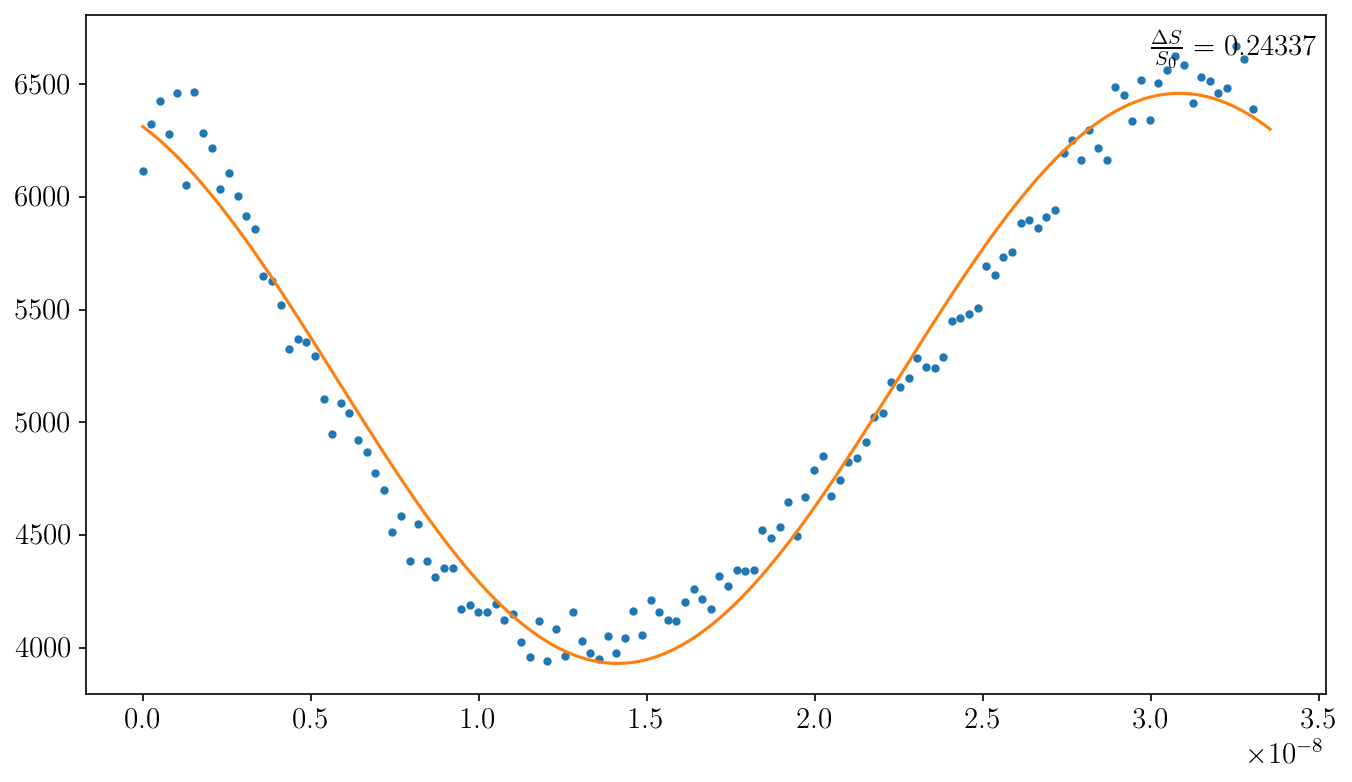

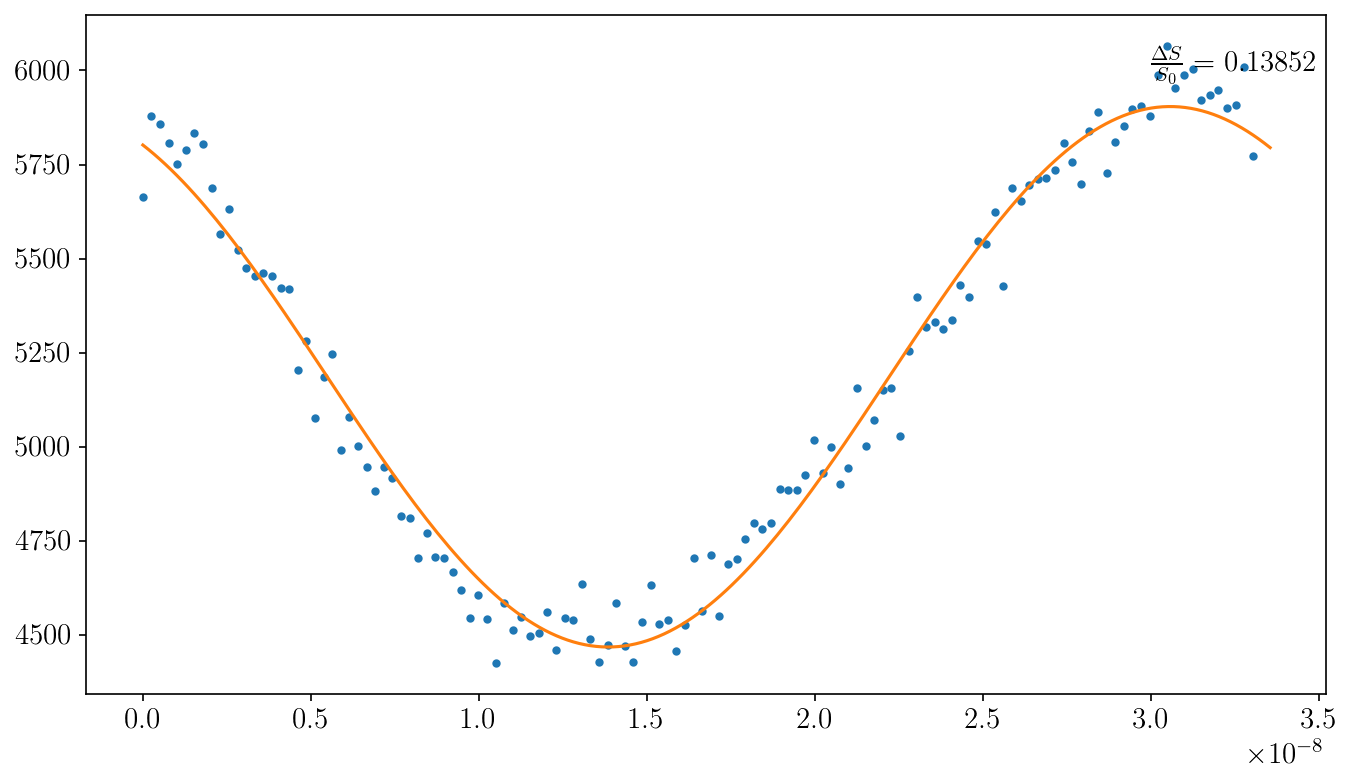

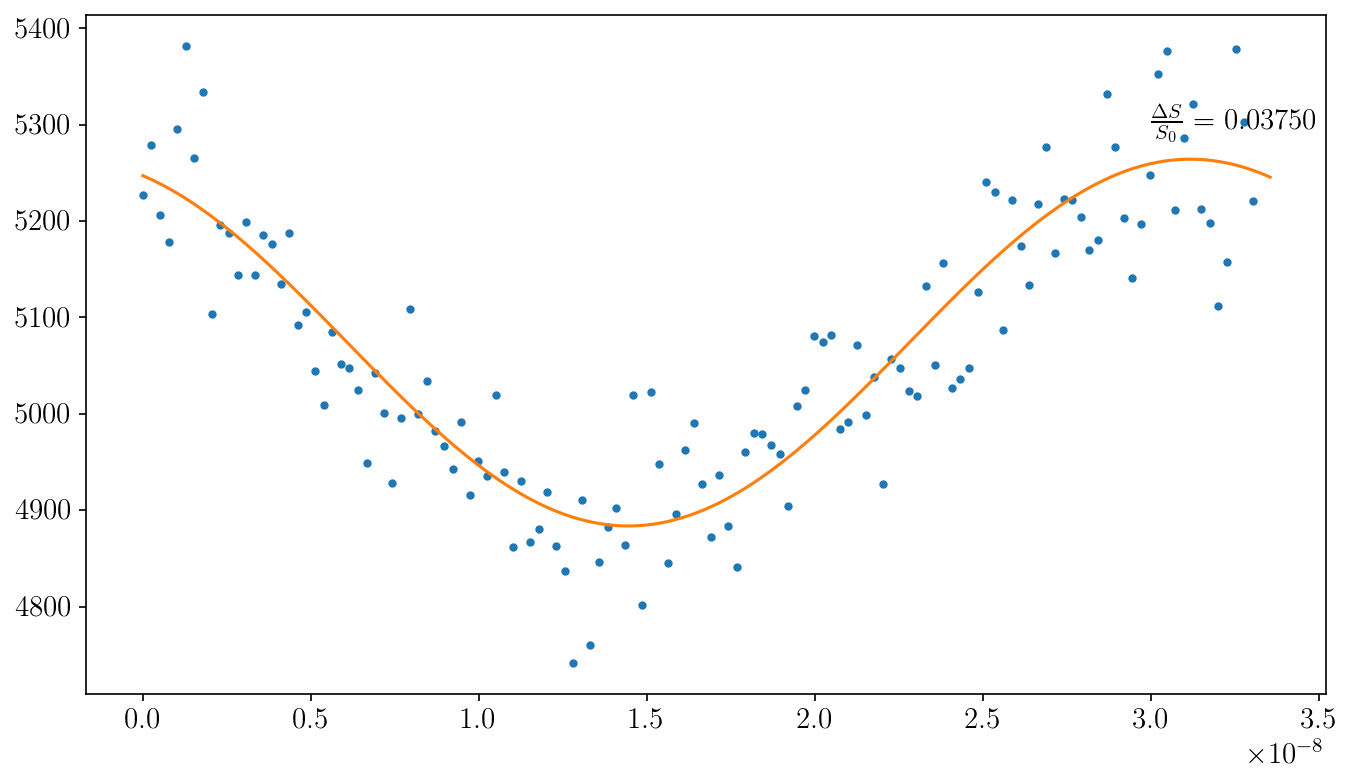

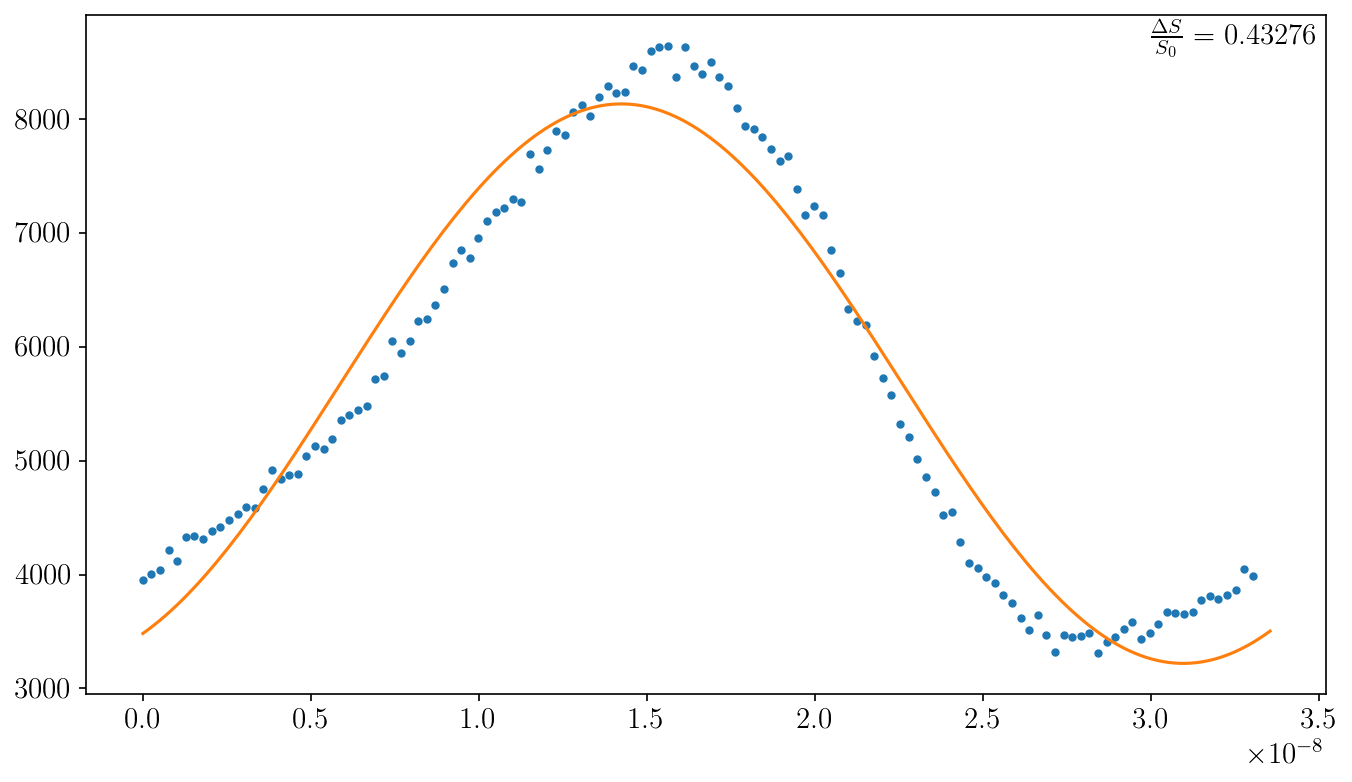

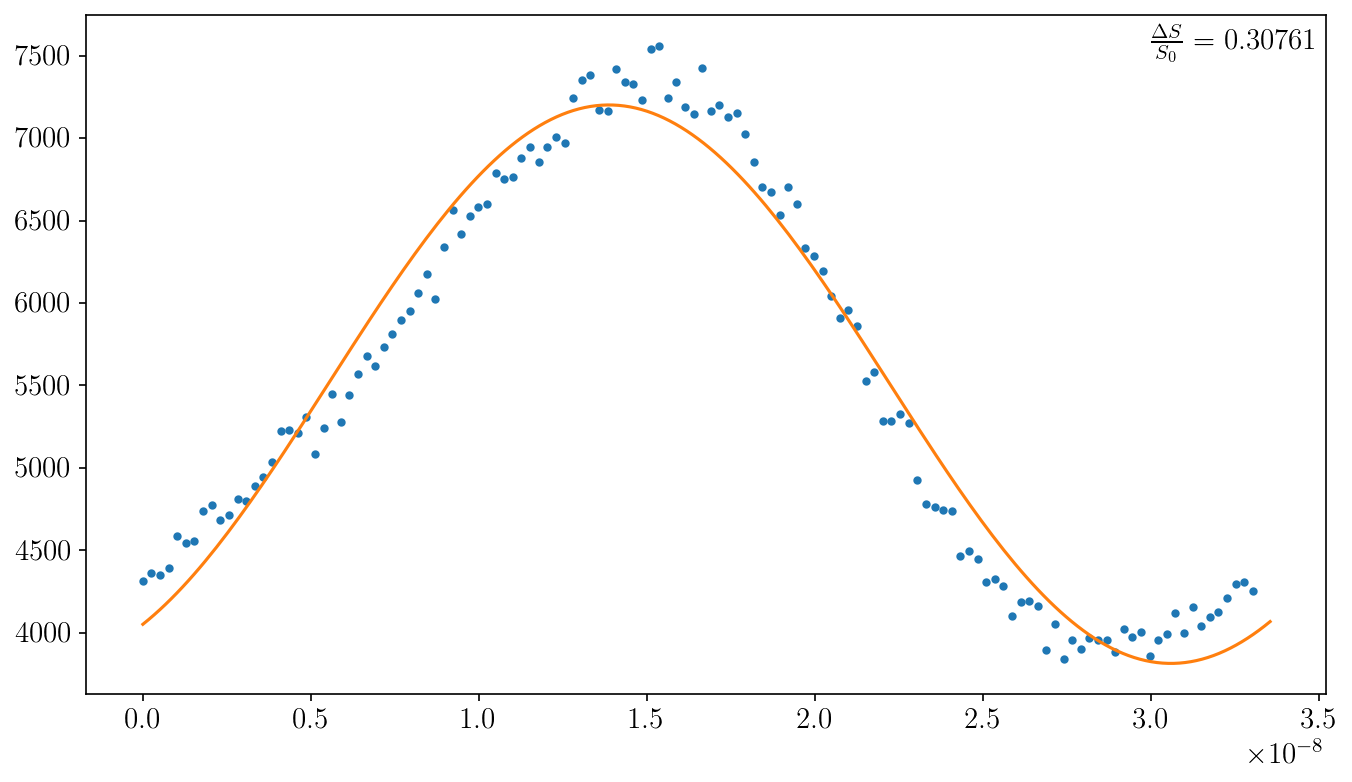

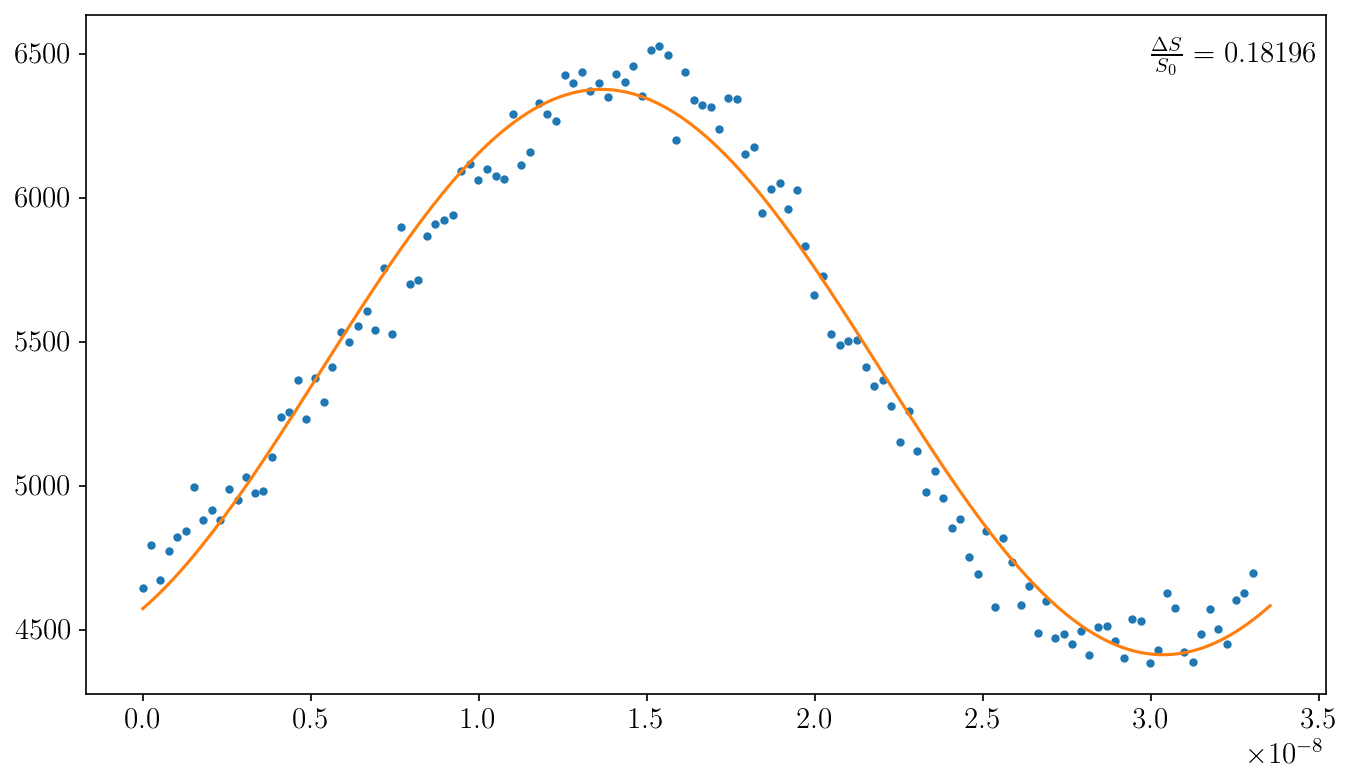

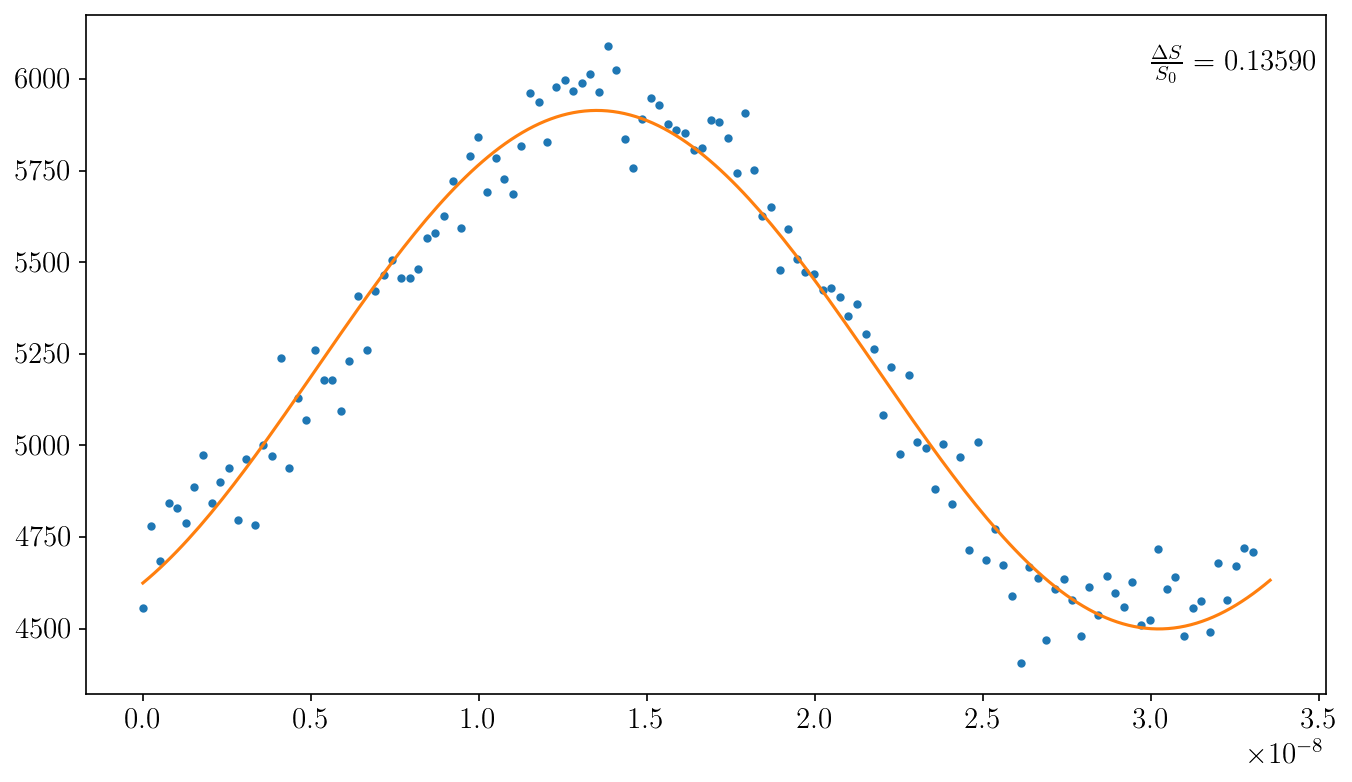

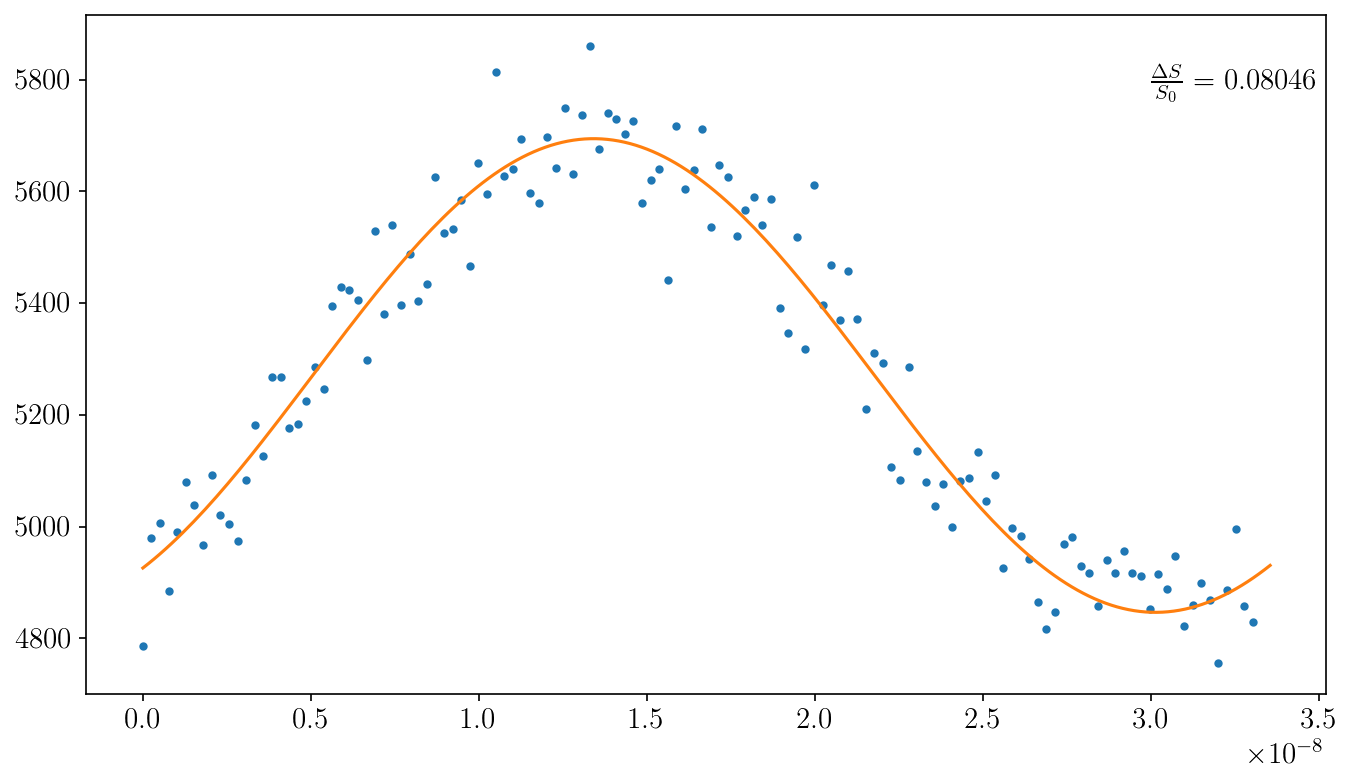

In [27]:
# plot techto fitu
time_fit = np.linspace(0, t_scale_cond.max(), 200)

for i in range(fotkor_cond_shape[1]):
    
    fotkor_cond_fit = fit_func(x_cond[:,i], Omega_cond, time_fit)
    
    plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
    plt.plot(t_scale_cond[:fotkor_cond_shape[0]-2],fotkor_cond[:fotkor_cond_shape[0]-2,i],'.')
    plt.plot(time_fit, fotkor_cond_fit)
    text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f}$'.format(x_cond[1,i]/x_cond[0,i])
    plt.text(3e-8, fotkor_cond[:,i].max()-100,text) 

Nyni nas kyzeny plot

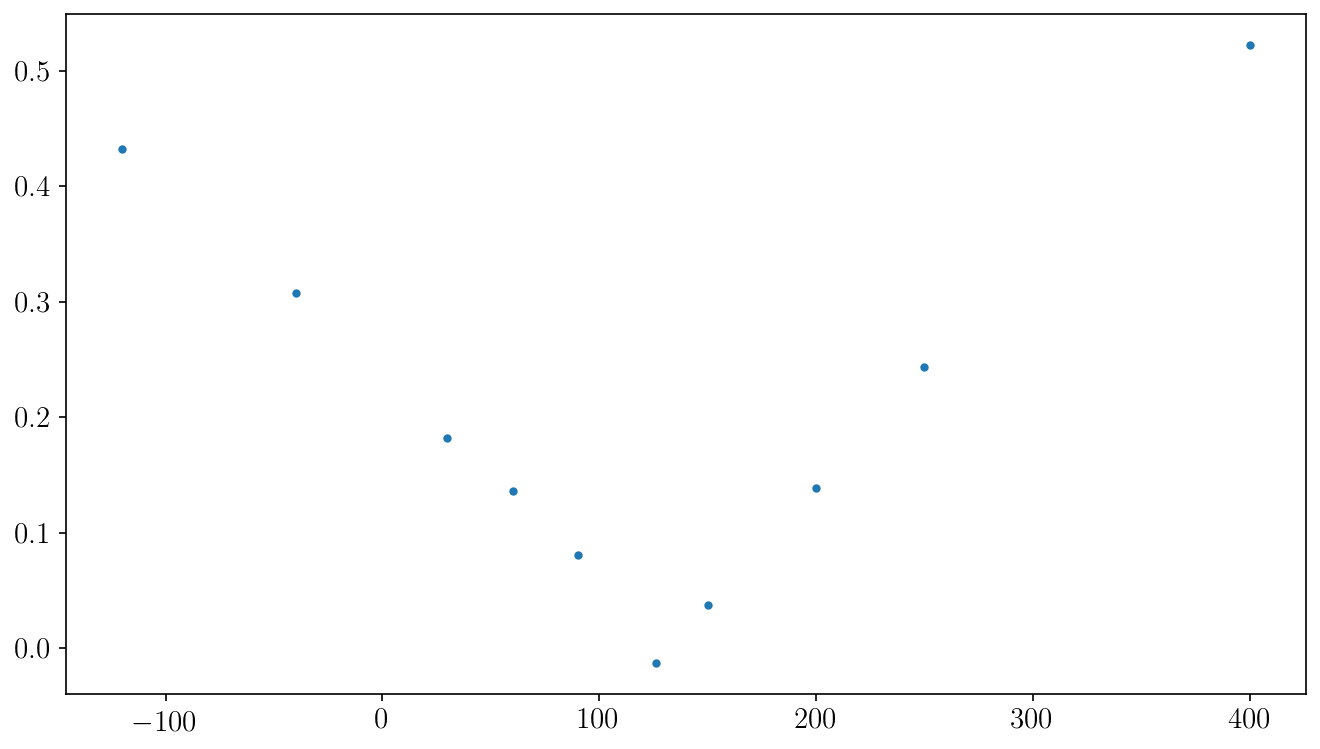

In [28]:
delta_U_cond = voltages_cond[:,0] - voltages_cond[:,1]

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(delta_U_cond, DeltaS_S_ratio_cond, '.')

oba dva grafy pres sebe

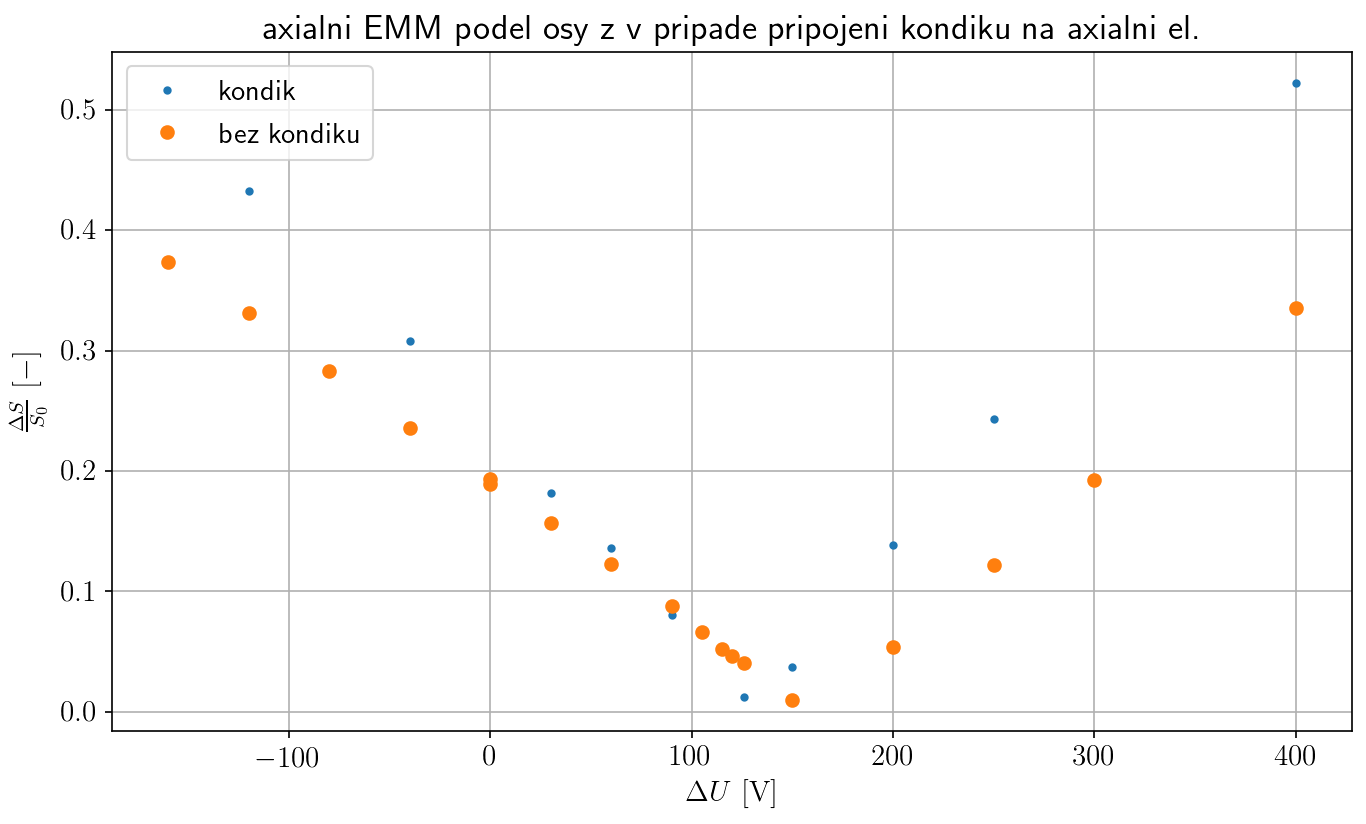

In [29]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(delta_U_cond, np.abs(DeltaS_S_ratio_cond), '.', label="kondik")
plt.plot(delta_U,np.abs( DeltaS_S_ratio ), 'o', label="bez kondiku")
plt.xlabel(r"$ \Delta U \, \, \rm [V]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")
plt.title(r"axialni EMM podel osy z v pripade pripojeni kondiku na axialni el.")

plt.legend()
plt.grid()
#plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/micromotion_measurements/axial_EMM_kondik_vs_bez.svg", 
#            bbox_inches="tight")

## vykresleni teto zavilsosti na ose $z$

In [30]:
alpha_bezcond = delta_U / (voltages_bezcond[:,0] + voltages_bezcond[:,1])
alpha_cond = delta_U_cond / (voltages_cond[:,0] + voltages_cond[:,1])

a = 0.000357087248516796
b = 0.0000614272209845667
c = 0.000214572720416111

z_bezcond = a* alpha_bezcond + b* alpha_bezcond**3 + c *alpha_bezcond**5
z_cond = a*alpha_cond  + b* alpha_cond**3 + c* alpha_cond**5

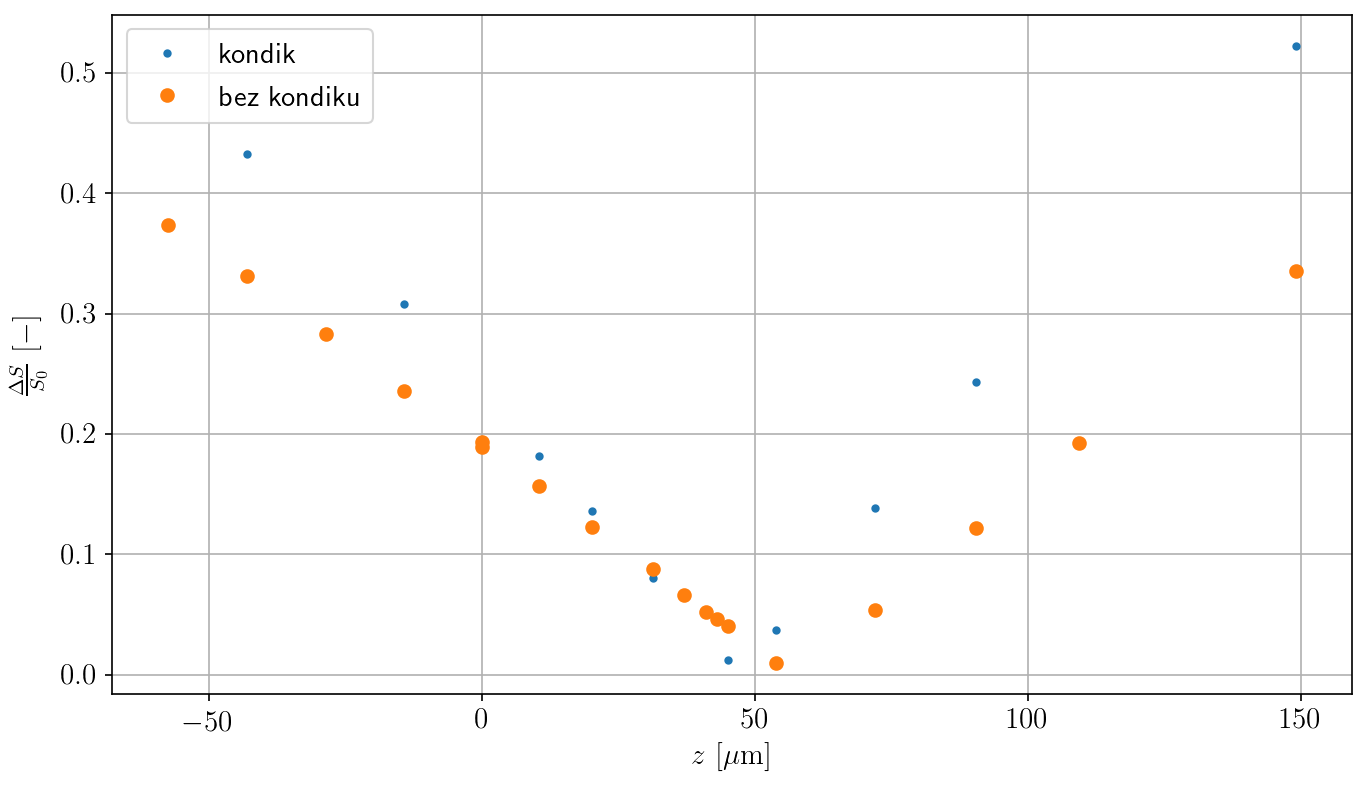

In [31]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_cond*1e6, np.abs( DeltaS_S_ratio_cond ), '.', label="kondik")
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.xlabel(r"$ z \, \, \rm [\mu m]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")

plt.legend()
plt.grid()

#plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/micromotion_measurements/axial_EMM_kondik_vs_bez_vs_z.svg", 
#            bbox_inches="tight")

## nafitovani grafu primkou

In [ ]:
# fce vracejici residua

def MM_resid(x, DS_S, z_points)
    return (DS_S - )